# Assessment 3
**Student Name: Matija Zivkovic**

**Student Number: 29901359**

## Notes:
* All the works should be done in this notebook and only using R Kernel.
* Change the name of the notebook as `a3-<student_number>-<student_name>.ipynb`
* Make sure save snapshots of your notebook as you are developing it.
* Make sure you submit the latest version after you saved the latest changes.
* Please keep the outputs and plots so we can see exactly what you produced.
* Provide concise and precise comments inside the code cells and discussion in the markdown cells.
* Choose proper names for your variables and struct an easy to follow notebook (e.g. using headings and cells).
* Choose proper titles, labels, and legends for the plots.
* Provide appropriate references if applicable.
* Only submit the notebook.

## Question 1: Predictive Models (70%)
### Background

The German Credit Card data set is for customers of a financial institution who have been labeled as “good” or “bad” credit risks (in fact: whether they repaid the loan or did not repay the loan). The dataset contains 21 attributes (20 predictors and one dependent variable) and 1000 instances, with no missing values (the data are real, but were cleaned up before being put into the archive). The specification of these attributes is given in the document `german.doc`.

In this question, you will build two classification models using logistic
regression and naive Bayes to report their performance metrics. Use the first 800 rows as the training data and the rest of the data for testing.

In [1]:
# load libraries
## The followings are just suggestions.
## You may choose to use different libraries
library(caret) # for confusion matrix and other stats
library(e1071) # for naiveBayes
library(ROCR)
library(ggplot2)
library(plotROC)

# load data
dataSet = read.table("../german.data")

# perform wrangling/reshaping

# Note: There was some text in the original .data file, beyond line 1000, which I manually removed.

# ‘Description of the German credit dataset’ gives all information about the data. 
# There are 20 predictors (V1 - V20) and response variable V21, which is an integer 
# taking values 1 (yes/good/true) and 2 (no/bad/false). To better accomodate the models 
# we will change V21 to have values 0 (bad) and 1 (good).

dataSet$V21 <- ifelse(dataSet$V21==2, 0, 1)

str(dataSet)

# form training and testing dataset
trainSet = dataSet[1:800, ]
testSet = dataSet[801:1000, ]

Loading required package: lattice
Loading required package: ggplot2
Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



'data.frame':	1000 obs. of  21 variables:
 $ V1 : Factor w/ 4 levels "A11","A12","A13",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ V2 : int  6 48 12 42 24 36 24 36 12 30 ...
 $ V3 : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ V4 : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ V5 : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ V6 : Factor w/ 5 levels "A61","A62","A63",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ V7 : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ V8 : int  4 2 2 2 3 2 3 2 2 4 ...
 $ V9 : Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ V10: Factor w/ 3 levels "A101","A102",..: 1 1 1 3 1 1 1 1 1 1 ...
 $ V11: int  4 2 3 4 4 4 4 2 4 2 ...
 $ V12: Factor w/ 4 levels "A121","A122",..: 1 1 1 2 4 4 2 3 1 3 ...
 $ V13: int  67 22 49 45 53 35 53 35 61 28 ...
 $ V14: Factor w/ 3 levels "A141","A142",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 3 levels "A151","A152",..: 2 2 2 3 3 3 2 1 2 2 ...
 $ V16: 

### Task 1.1:
Build a logistic regression and a naive Bayes model using all predictors. Report their efficiency regarding precision, recall, and F1 score using the test data. Compare the two models and explain your findings.


Call:
glm(formula = V21 ~ ., family = binomial, data = trainSet)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5591  -0.6663   0.3604   0.6979   2.7373  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.978e-01  1.249e+00  -0.318 0.750139    
V1A12        2.701e-01  2.437e-01   1.108 0.267784    
V1A13        9.306e-01  4.018e-01   2.316 0.020567 *  
V1A14        1.737e+00  2.686e-01   6.465 1.02e-10 ***
V2          -2.893e-02  1.042e-02  -2.777 0.005479 ** 
V3A31       -2.255e-01  6.289e-01  -0.359 0.719936    
V3A32        7.639e-01  4.753e-01   1.607 0.108022    
V3A33        9.172e-01  5.233e-01   1.753 0.079627 .  
V3A34        1.487e+00  4.907e-01   3.031 0.002440 ** 
V4A41        1.832e+00  4.425e-01   4.141 3.46e-05 ***
V4A410       1.413e+00  8.263e-01   1.710 0.087326 .  
V4A42        9.368e-01  2.990e-01   3.134 0.001727 ** 
V4A43        9.044e-01  2.799e-01   3.230 0.001236 ** 
V4A44        8.312e-01  8.946e-01  

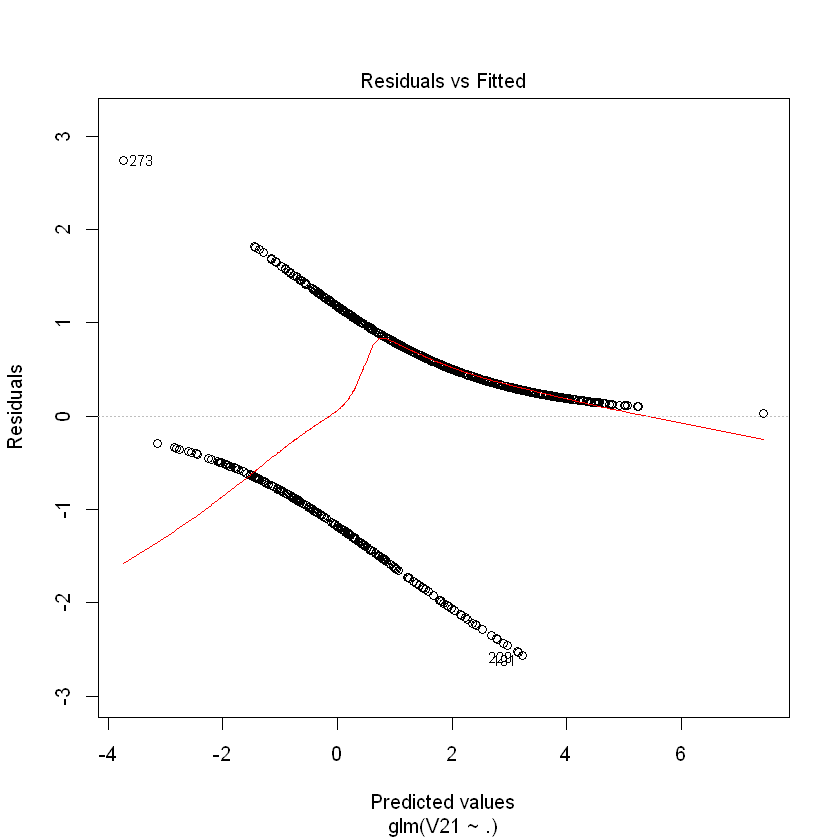

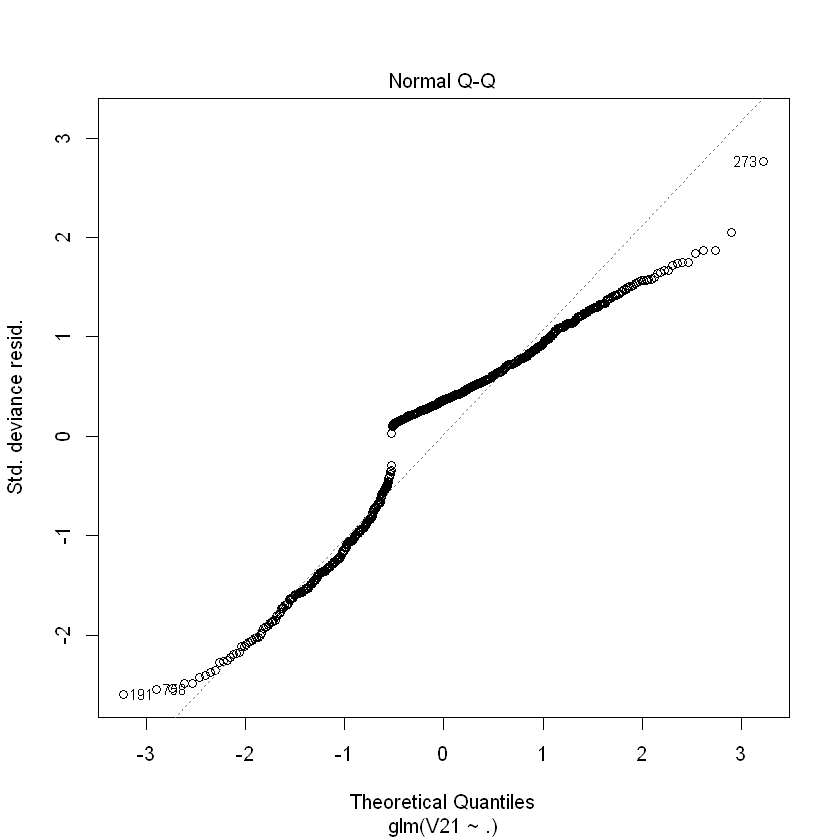

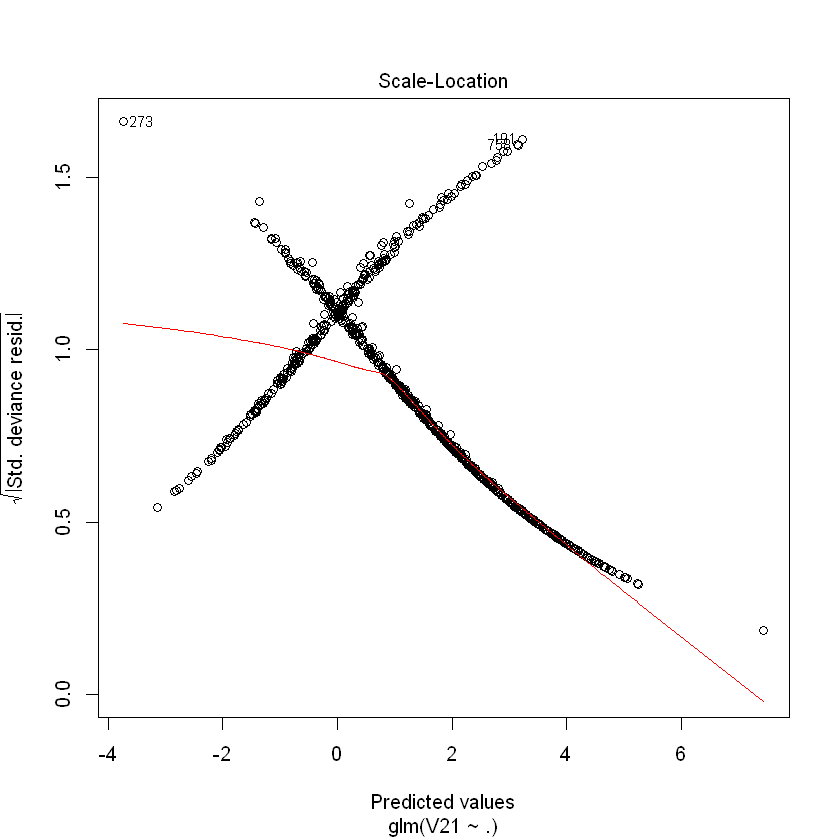

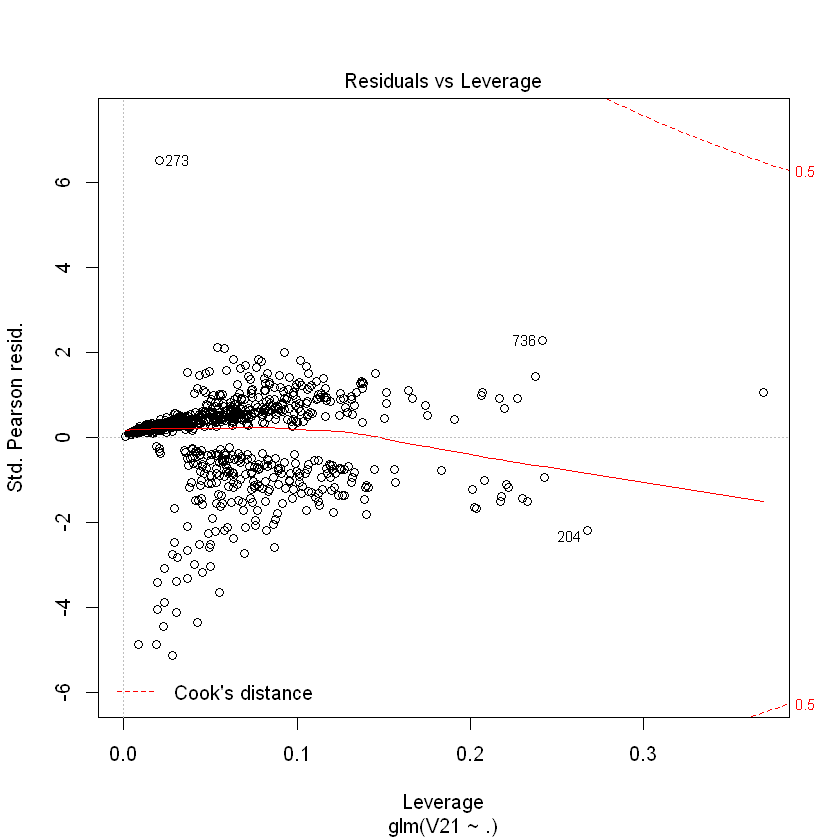

In [2]:
# create the logistic regression model using trainSet, with all predictors:
log_reg <- glm(V21~., data = trainSet, family = binomial)

# Summary stats about the model
summary(log_reg)

# Plot the model
plot(log_reg)

In [3]:
# Now let us test the model on testSet:
# Predict the resulting variable:
p_lr <- predict(log_reg, testSet, type = "response")

# Look at the probabilities, against the actual values:
head(cbind(p_lr, testSet$V21))

,p_lr,
801,0.7630939,1
802,0.8606163,1
803,0.6410739,1
804,0.9774090,1
805,0.5677489,1
806,0.4951014,0


In [4]:
# Precision, recall, and F-Score:

# Print the confusion matrix of Predicted vs Actual values.
(cm_lr <- table("Actual"=testSet$V21,"Prediction"=round(p_lr)))

      Prediction
Actual   0   1
     0  32  29
     1  24 115

In [5]:
# Accuracy is a proportion of correctly classified instances (TP + TN)/n (n = number of observations)
# We have an accuracy of 73.5 i.e. our model predicted the variable correctly 73.5% of the time

n <- nrow(testSet)              
diag <- diag(cm_lr) 
Accuracy <- sum(diag)/n
round(Accuracy*100,2)

[1] 73.5

In [6]:
# As an additional metric, we can print the distribution of observations (as percentages) over the Actual and Predicted classes. 
# They are pretty close.

rsums = apply(cm_lr, 1, sum)    # number of observations per class
csums = apply(cm_lr, 2, sum)    # number of predictions per class
Actual.Dist = rsums / n         # distribution of observations over the actual classes
Predicted.Dist= csums / n       # distribution of observations over the predicted classes
round(data.frame(Actual.Dist,Predicted.Dist)*100,2)

# Note that the company would like to reduce risk - a False Positive is worse than a False Negative. 
# The model predicts more Positives than the actual data. 
# The model is more biased towards 1, therefore this will introduce some False Positives.

,Actual.Dist,Predicted.Dist
0,30.5,28
1,69.5,72


In [7]:
# Now we measure Precision, Recall and F1.

# Precision gives TP/(TP+FP) and TN/(TN+FN), i.e how many are classified correctly for each class. 
# Recall is TP/(TP+FN) and TN/(TN+FP), i.e. the fraction of classes correctly predicted. 
# There’s tradeoff between the two - if one increases the other decreases.

Precision = diag / csums

Recall = diag / rsums

F1 = 2 * Precision * Recall / (Precision + Recall) 
round(data.frame(Precision, Recall, F1, Actual.Dist, Predicted.Dist)*100,2) 

# Overall looking at the Precision, Recall and F1, we can conclude that the model is better at predicting Positives than
# it is at predicting Negatives.

,Precision,Recall,F1,Actual.Dist,Predicted.Dist
0,57.14,52.46,54.70,30.5,28
1,79.86,82.73,81.27,69.5,72


In [8]:
# Now we calculate Naive Bayes

library(naivebayes)
library(dplyr)
library(psych)

# Naive Bayes requires the response variable to be categorical:
trainSet$V21 <- as.factor(trainSet$V21)

# create the Naive Bayes model on training data, using all predictors:
n_bayes <- naive_bayes(trainSet$V21 ~ ., data = trainSet)
n_bayes


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha



===================== Naive Bayes ===================== 
Call: 
naive_bayes.formula(formula = trainSet$V21 ~ ., data = trainSet)

A priori probabilities: 

      0       1 
0.29875 0.70125 

Tables: 
     
V1             0          1
  A11 0.41422594 0.19607843
  A12 0.38912134 0.23707665
  A13 0.05020921 0.07664884
  A14 0.14644351 0.49019608

      
V2            0        1
  mean 24.55649 18.98752
  sd   13.27805 11.25317

     
V3             0          1
  A30 0.08368201 0.02317291
  A31 0.08786611 0.02852050
  A32 0.54811715 0.52228164
  A33 0.10041841 0.08377897
  A34 0.17991632 0.34224599

      
V4              0          1
  A40  0.29707113 0.20142602
  A41  0.05020921 0.12299465
  A410 0.01673640 0.01069519
  A42  0.18828452 0.17647059
  A43  0.20920502 0.30837790
  A44  0.01255230 0.01069519
  A45  0.02928870 0.02139037
  A46  0.08368201 0.04456328
  A48  0.00418410 0.01247772
  A49  0.10878661 0.09090909

      
V5            0        1
  mean 3815.962 2924.717
  sd   3432

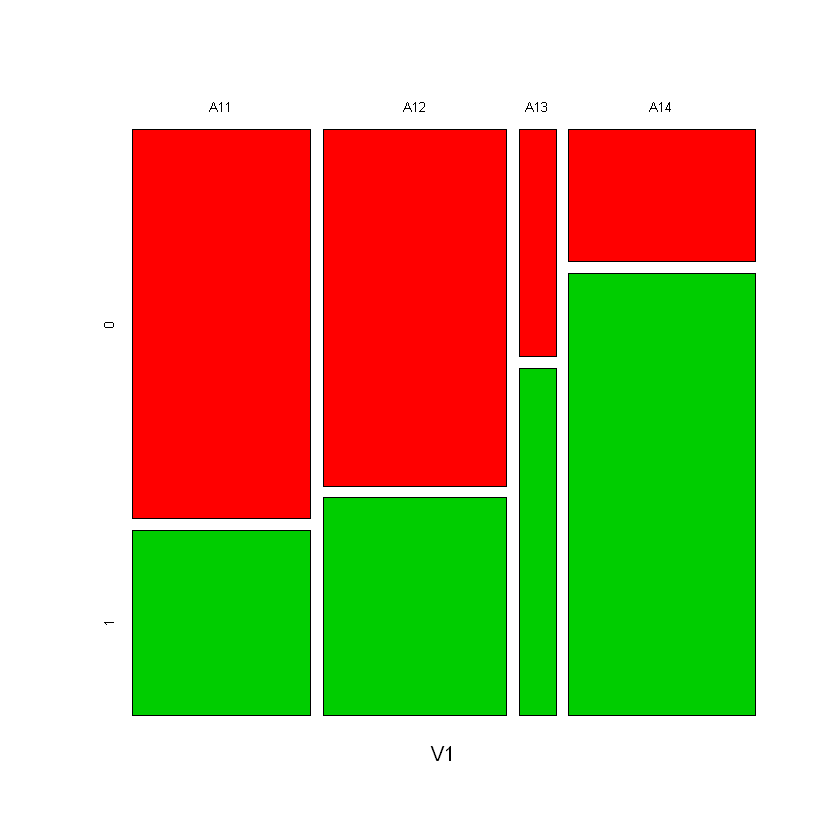

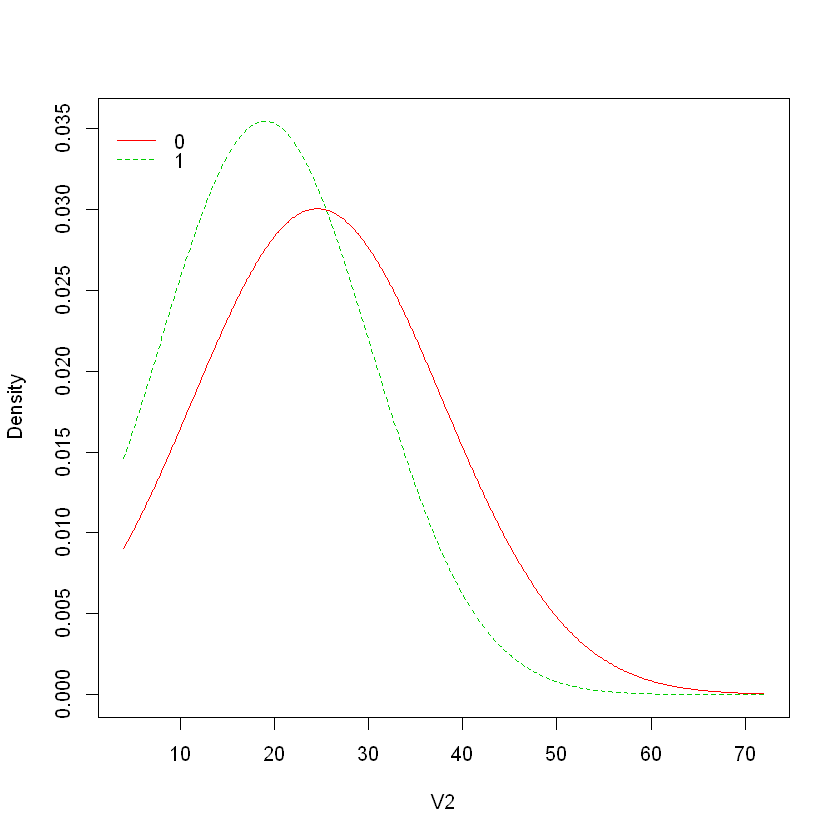

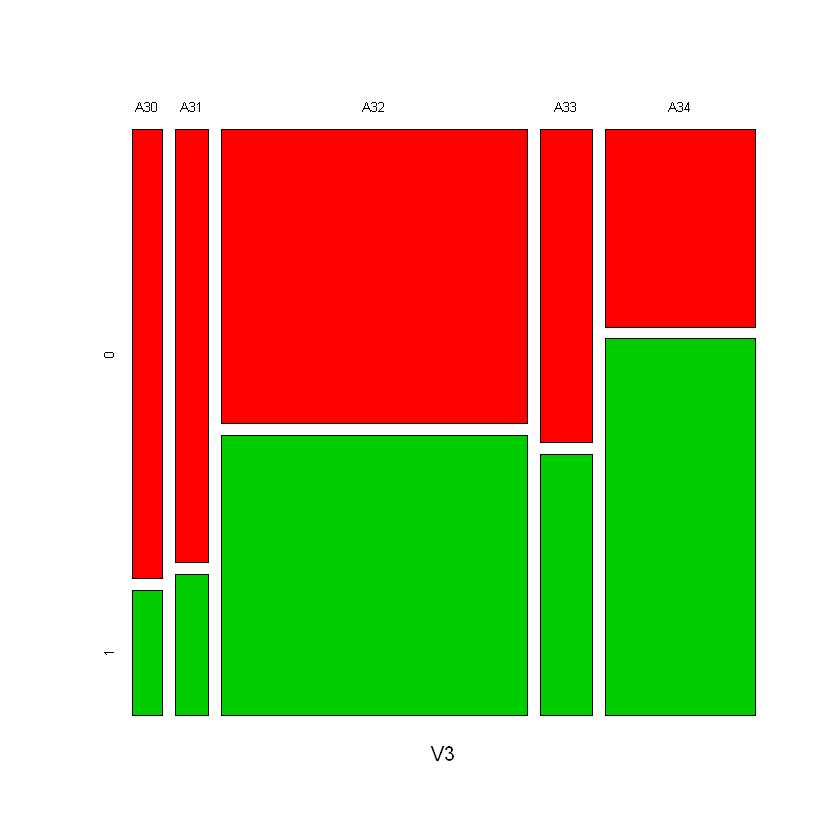

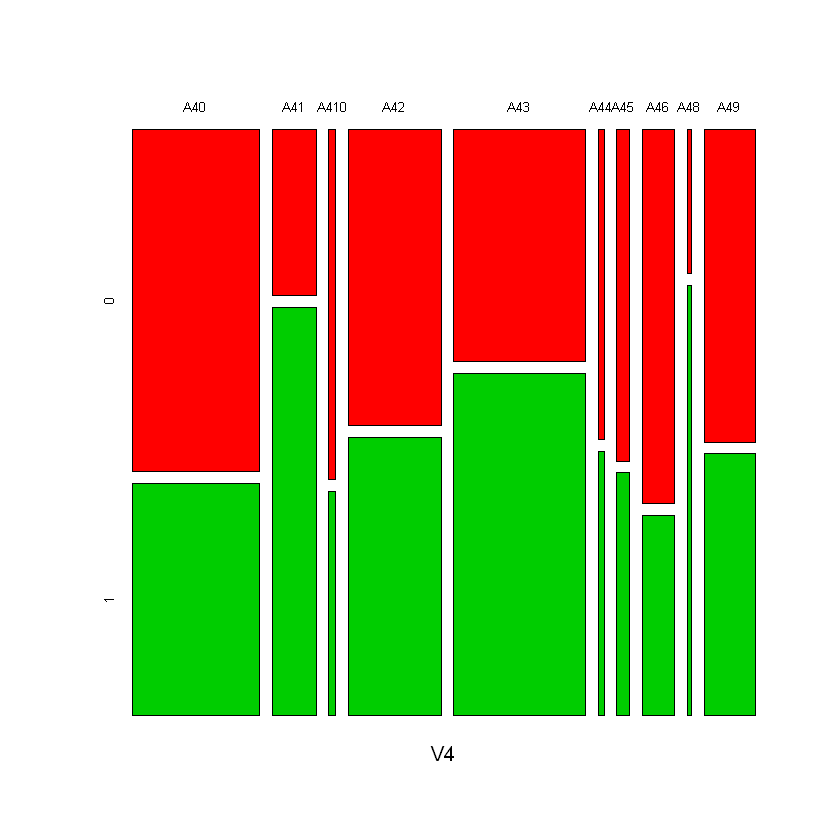

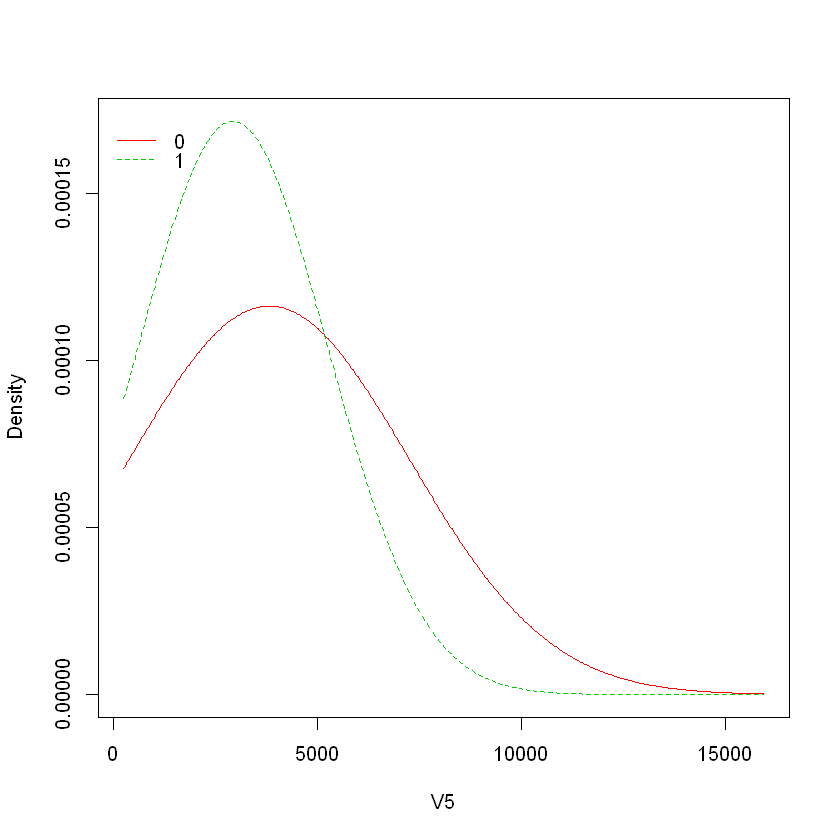

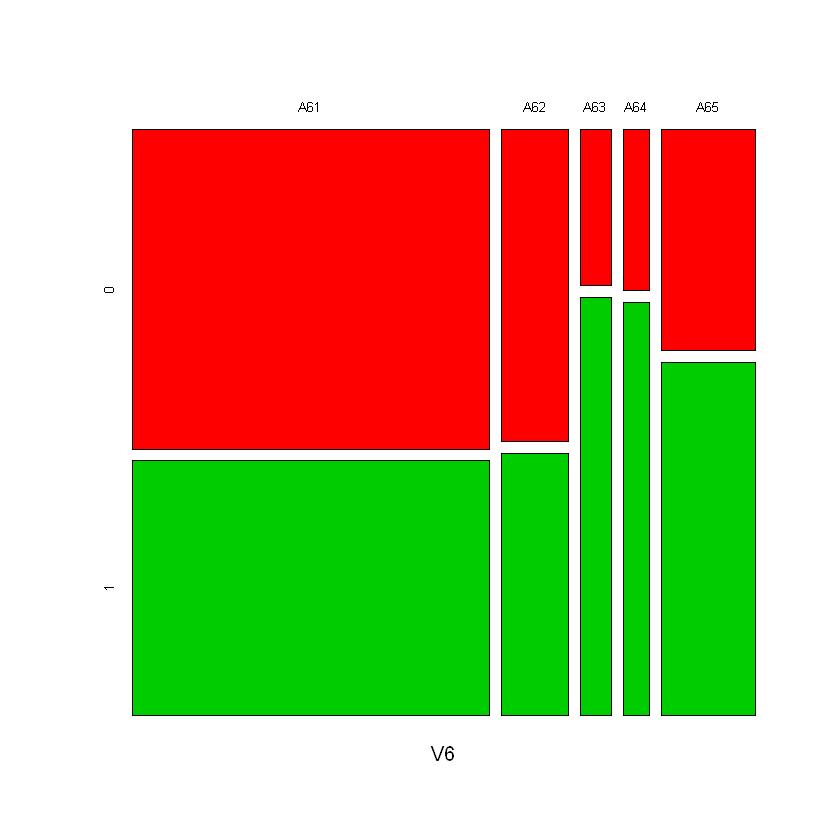

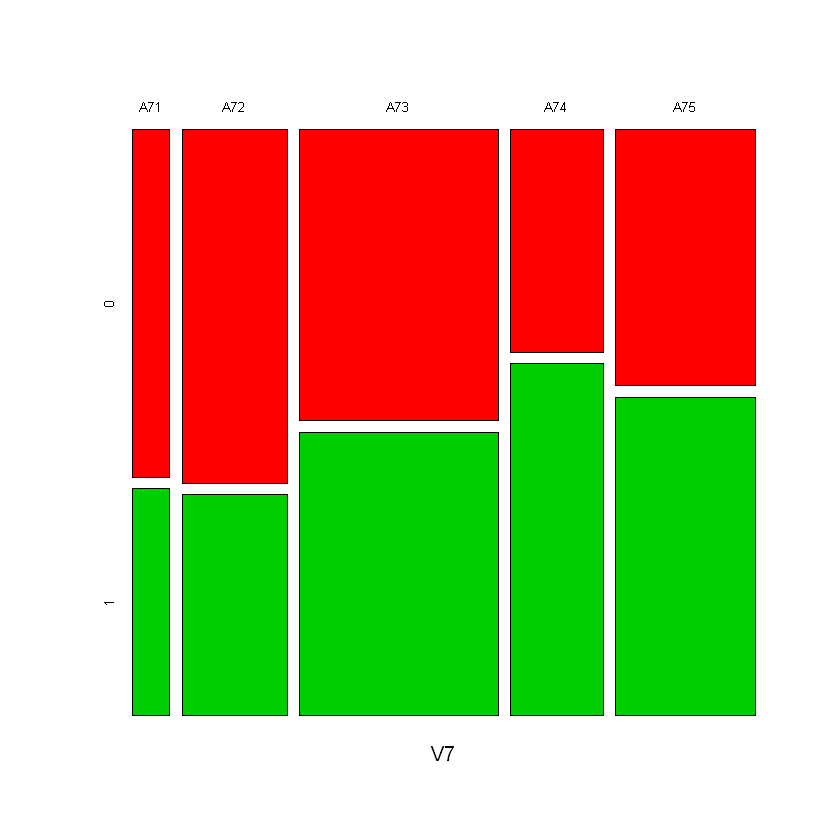

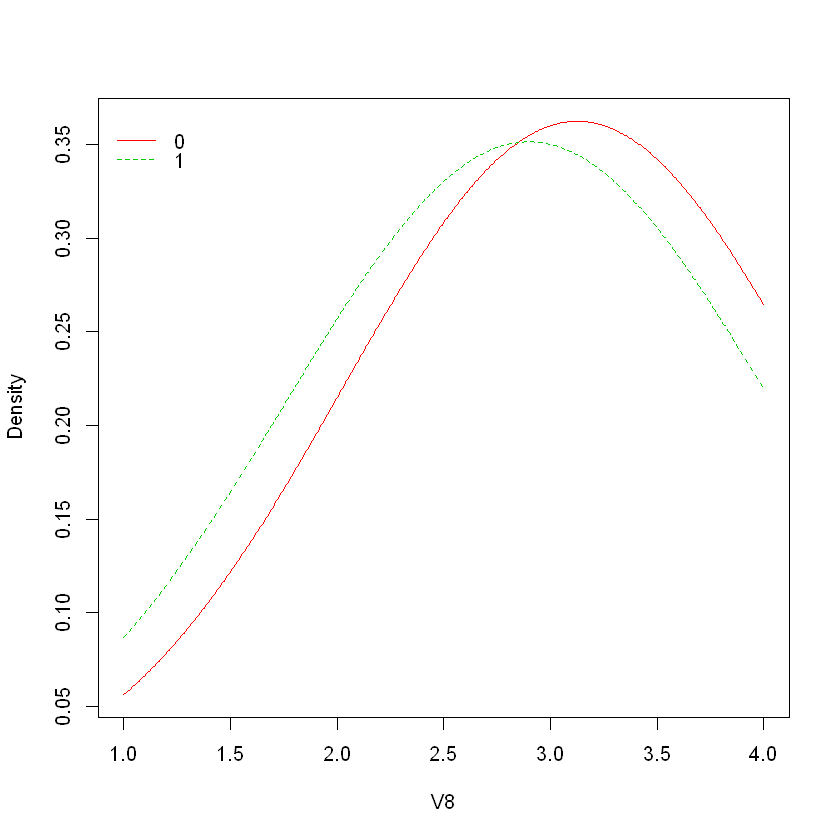

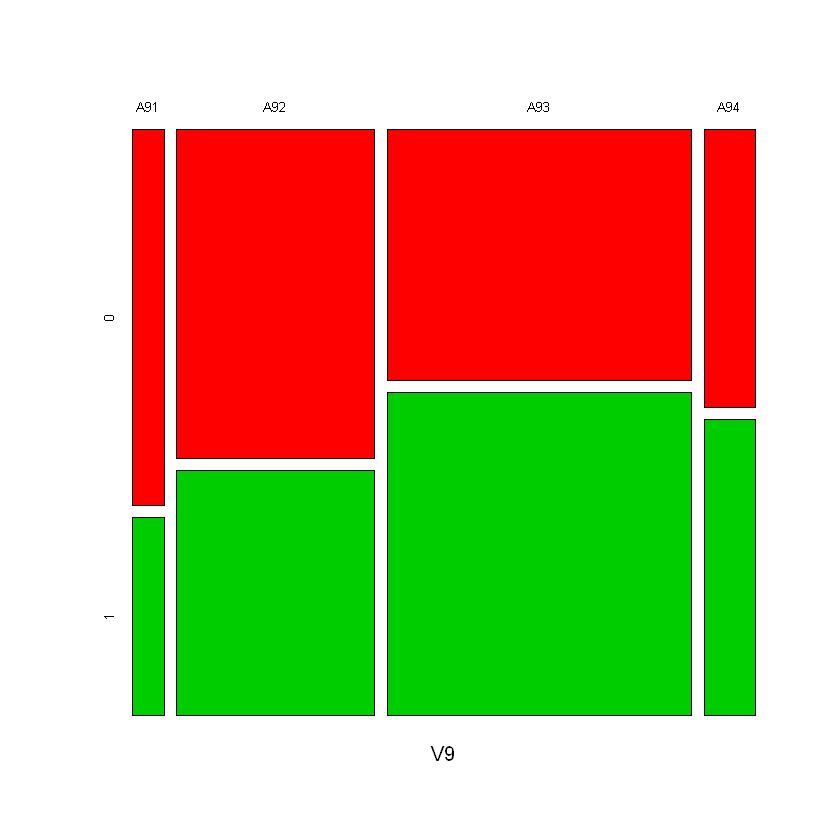

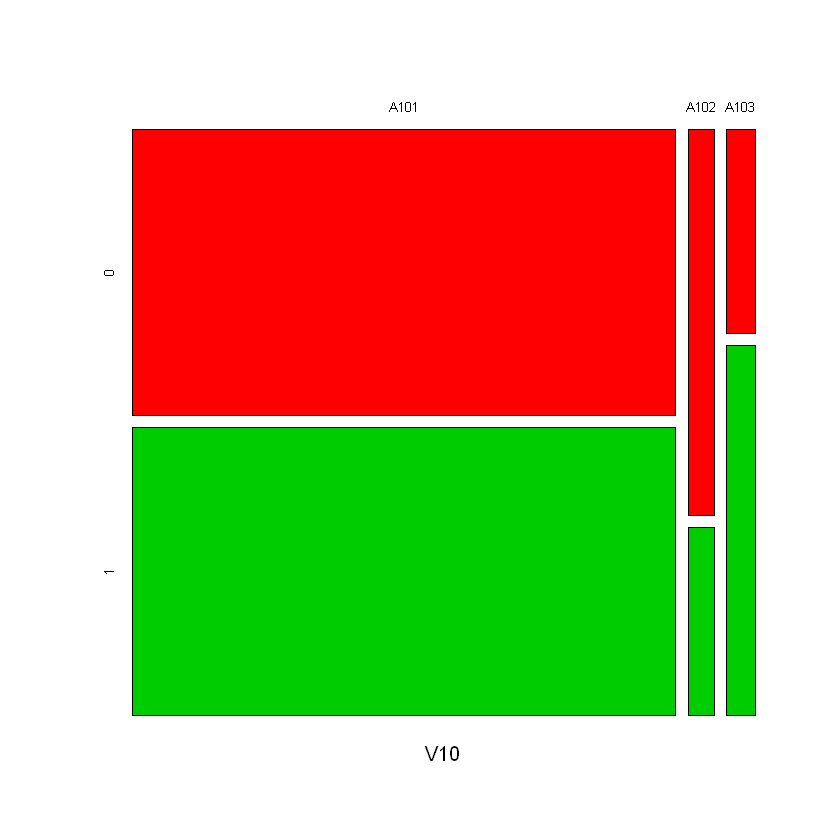

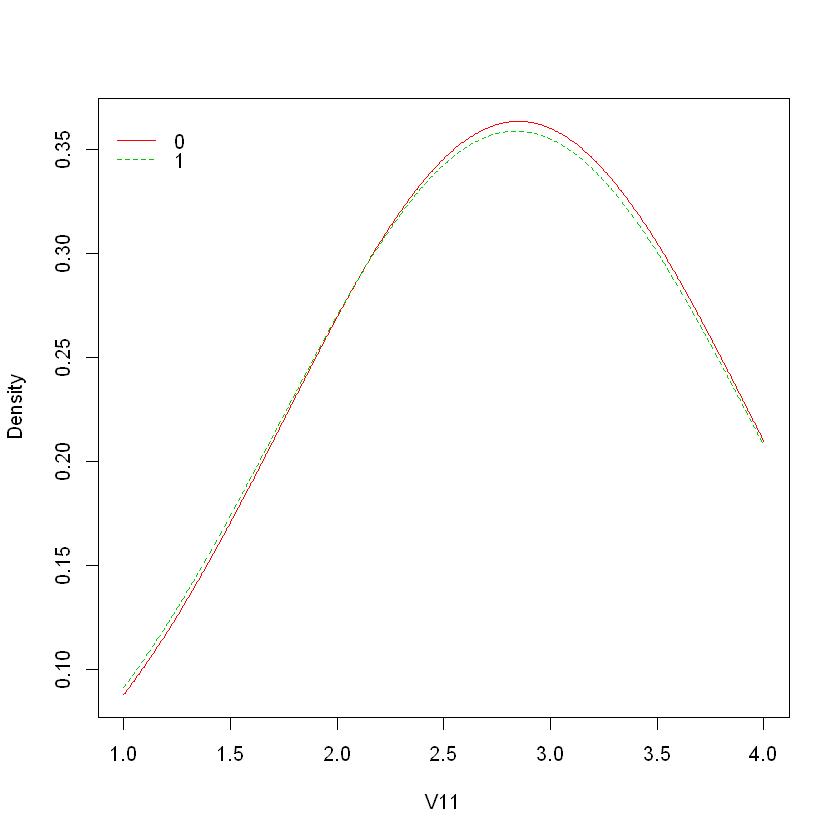

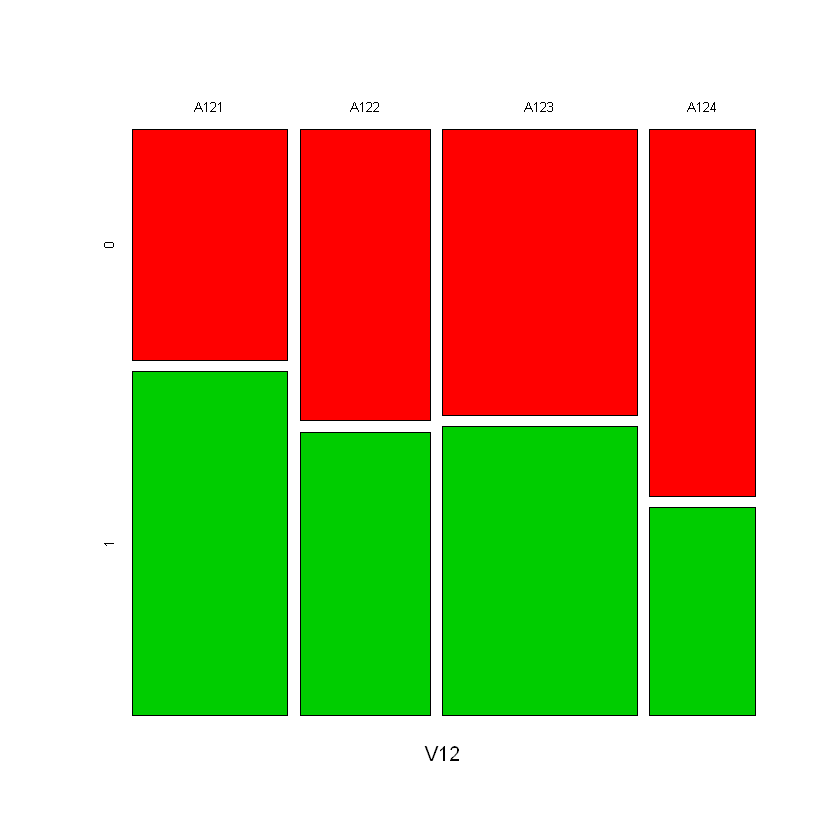

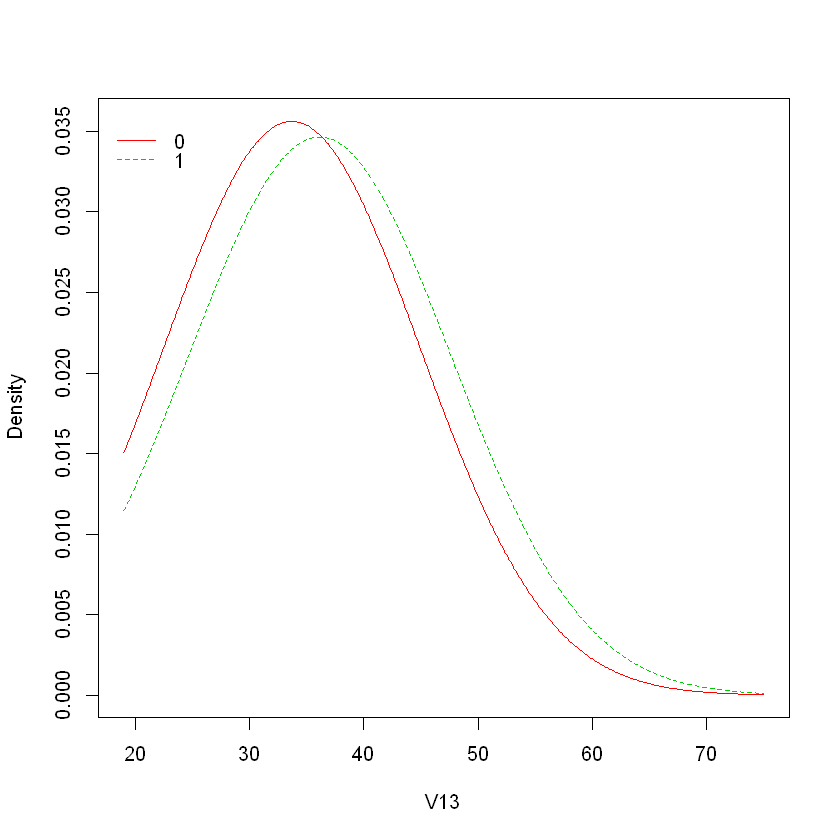

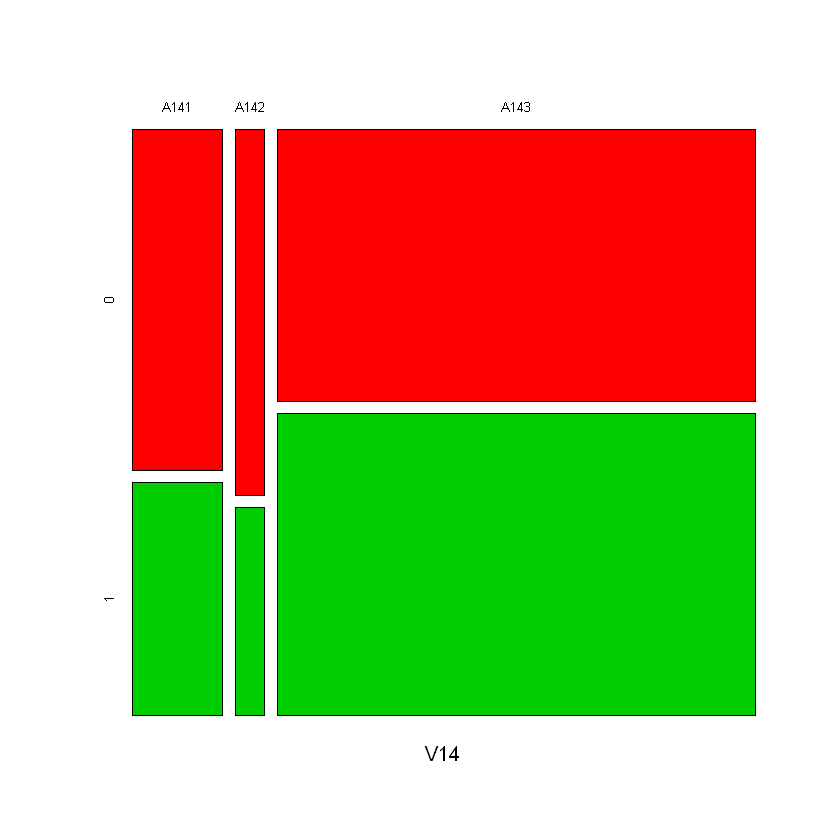

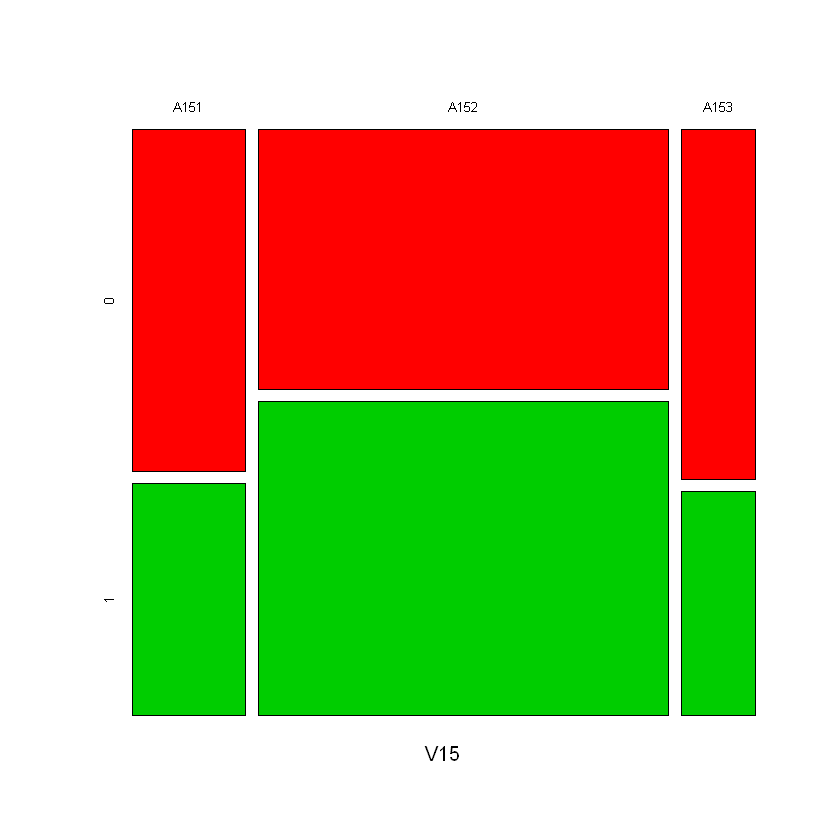

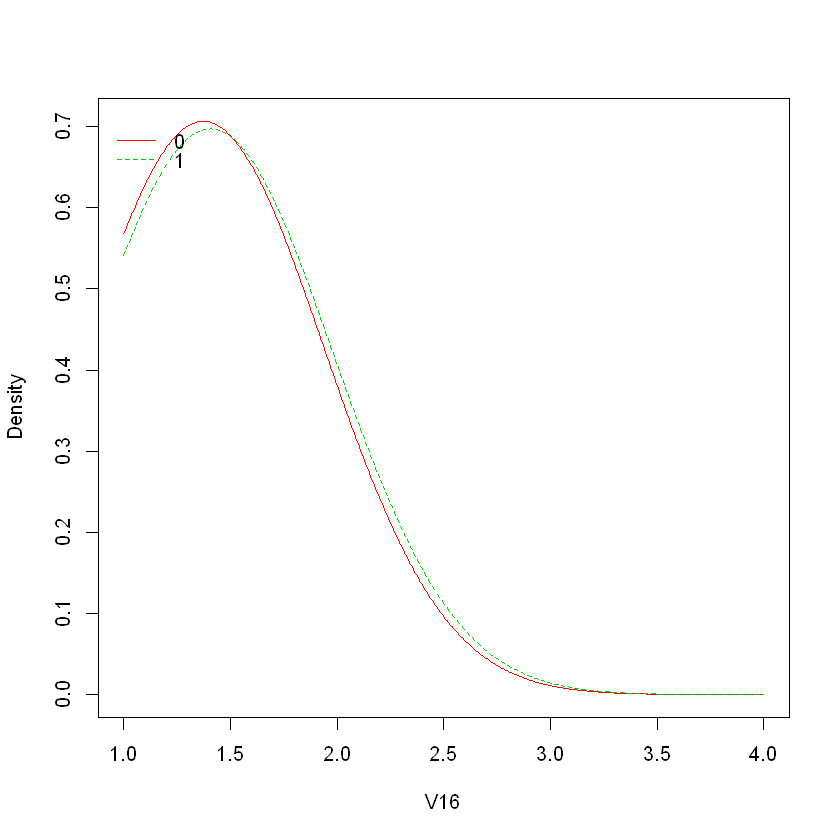

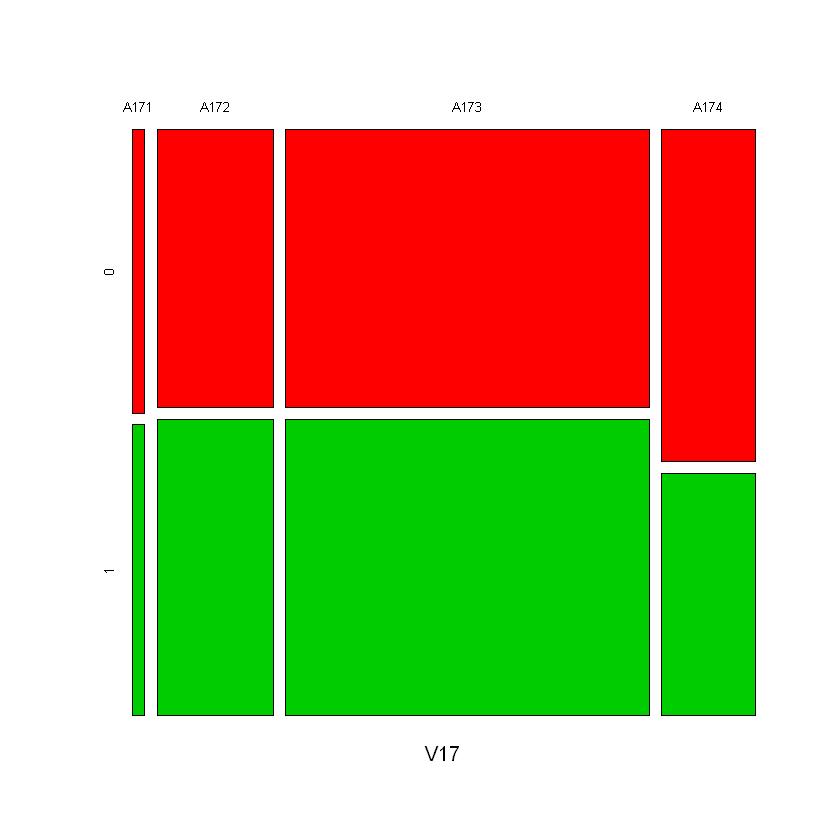

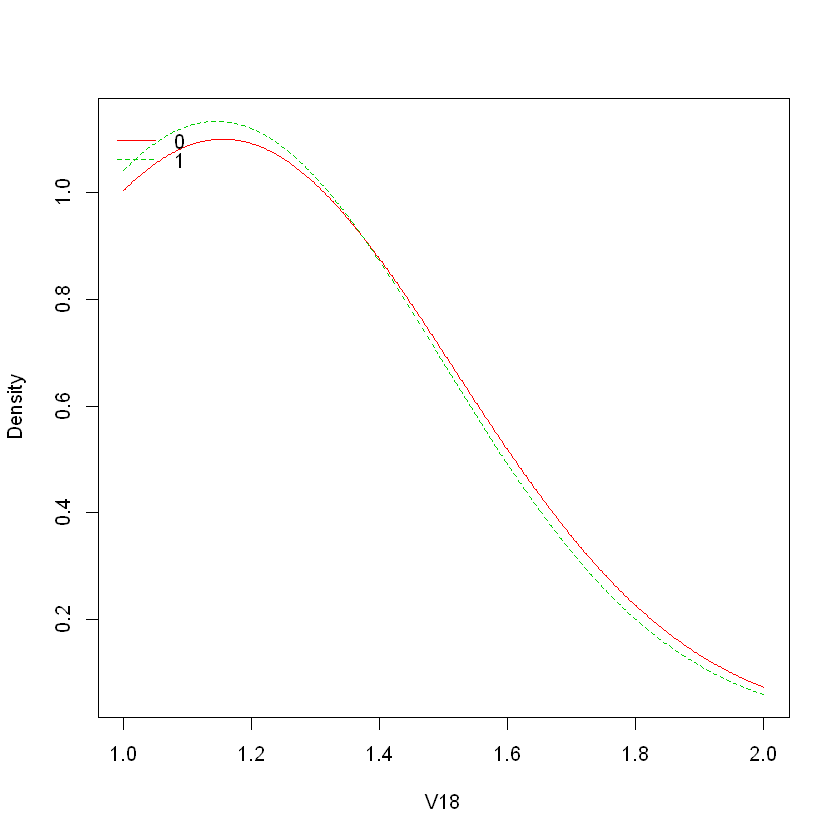

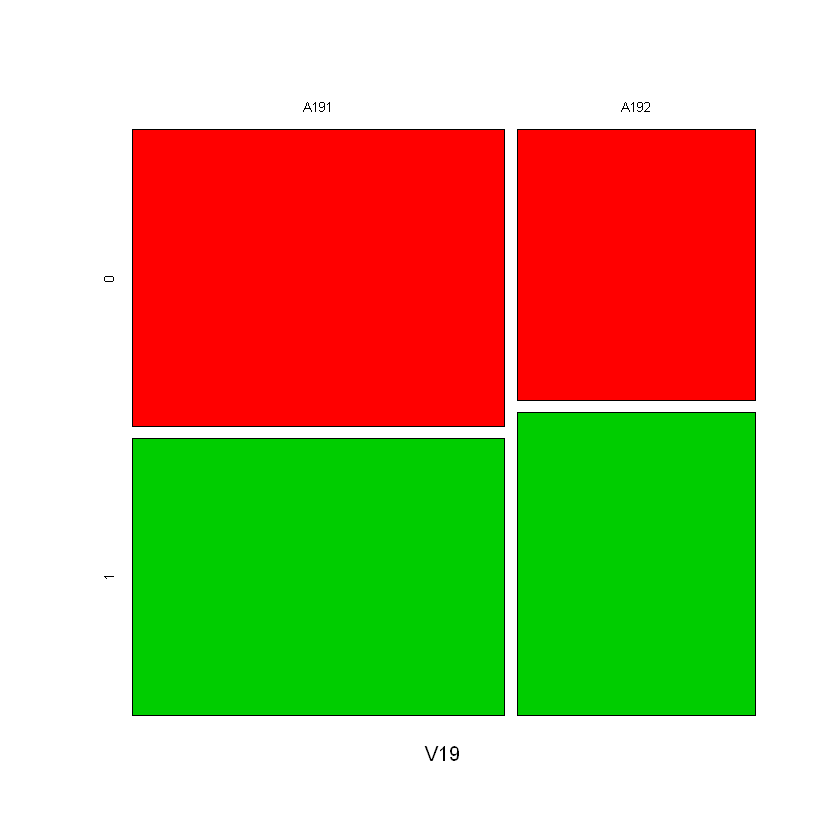

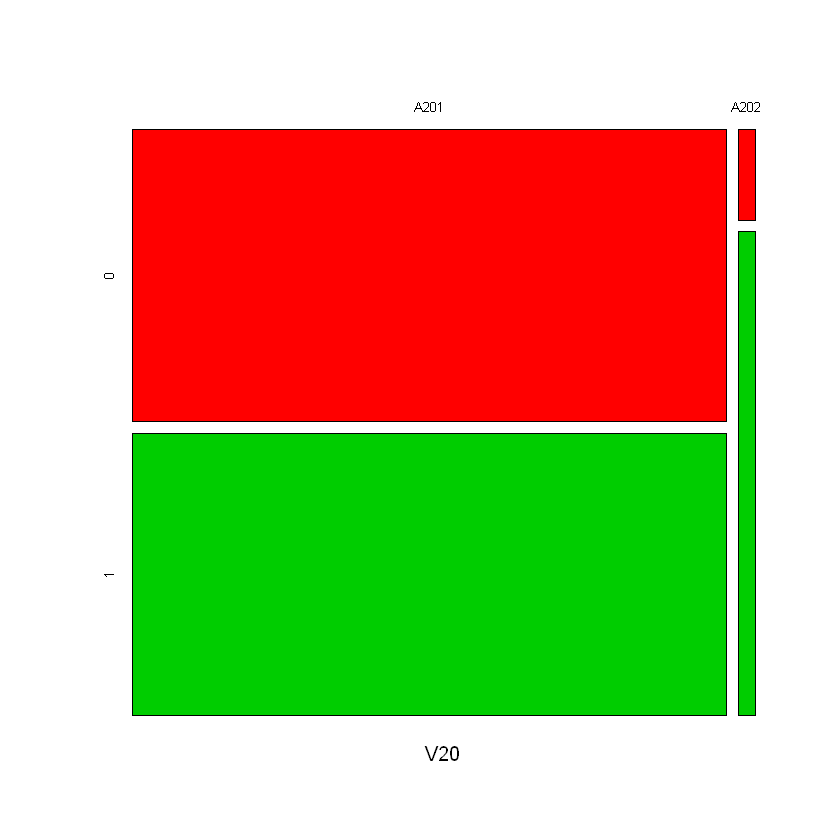

In [9]:
plot(n_bayes)

# The below diagrams tell us:
# For categorical variables - what percentage were classified 0 or 1 for each the factors of that variable
# For continuous variables - what percentage of variables were classified as 0 or 1 for different values of that variable.
# Note that if the curves overlap a lot, this means that the variable may not be useful. It means that, for this variable,
# a similar number of values were being classified as 0 or 1 at the same point. This means other
# variables may have a larger part to play in prediction, and this variable may not have much predicting power and can
# be dropped from the model.

In [10]:
# Now we will use the test data on the fitted model for the metrics:

# Predict the response variable:
p_nb <- predict(n_bayes, testSet, type="prob")

head(cbind(p_nb, testSet$V21))

0,1,
0.127214663,0.8727853,1
0.076874314,0.9231257,1
0.205013341,0.7949867,1
0.007010298,0.9929897,1
0.652460892,0.3475391,1
0.890470828,0.1095292,0


In [11]:
# Now we draw a confusion matrix to see how well the prediction worked:

print(cm_nb <- as.matrix(table("Actual"=testSet$V21,"Prediction"=round(p_nb[,2]))))

      Prediction
Actual   0   1
     0  36  25
     1  17 122


In [12]:
# The accuracy will be (TP+TN)/n, where n is no of observations:

dm <- diag(cm_nb)
acc_nb <- sum(dm)/nrow(testSet)
print(round(acc_nb*100,2))

# This 79% compares to the Logistic Model's accuracy of 73.5%. Therefore, Naive Bayes is more accurate. 

[1] 79


In [13]:
# Distribution over actual and predicted:
rs <- apply(cm_nb, 1, sum)
cs <- apply(cm_nb, 2, sum)
actual_dist <- rs/nrow(testSet)
predicted_dist <- cs/nrow(testSet)
round(data.frame(actual_dist, predicted_dist)*100,2)

# The Naive Bayes model predicts even more Positives than the Logistic Regression (73.5% vs 72%).
# Again, this bias towards Positive predictions is not ideal for the company.

,actual_dist,predicted_dist
0,30.5,26.5
1,69.5,73.5


In [14]:
# Precision, recall and F1 for each class.

Precision = dm/cs
Recall = dm/rs
F1 = 2*Precision*Recall/(Precision+Recall)
round(data.frame(Precision, Recall, F1, actual_dist, predicted_dist)*100, 2)

,Precision,Recall,F1,actual_dist,predicted_dist
0,67.92,59.02,63.16,30.5,26.5
1,82.99,87.77,85.31,69.5,73.5


In [15]:
# Overall, Naive Bayes is better at predicting both Positive and Negative outcomes (i.e. whether a customer is 'good' or 
# 'bad'). It is therefore the better model to use. However, it also predicts more values as Positive. Getting a False Positive
# is a worse outcome for the business than a False Negative (i.e. it's worse to predict a customer being Good when they are Bad).

# This is reflected in the difference in the Recall vs Precision. Though the Naive Bayes model is getting 87.77% of actual
# positives correct, it is getting 82.99% of its Positive predictions correct - i.e. it is making too many Positive
# predictions. The difference of almost 5% reflects this, whereas in the Logistic model this difference is 3%. 

# Likewise, Precision > Recall in the Negative class for both models implies that the models aren't predicting enough
# Negative predictions.

### Task 1.2:
Based on the summaries of the two models built in (1), select a subset of
variables that could achieve the same or better performance (in one or more metrics) than the model made above using all predictors. Report the new models' performance regarding precision, recall, and F1 score. Discuss why having a model with less number of attributes is beneficial.

In [16]:
# Having a model with less attributes is beneficial because there is less risk of overfitting. An over-fitted model will do 
# poorer with new data points. It is also preferable to have less attributes because you may not always have complete data - 
# a model with a lot of attributes will rely on more complete data sets, and missing/sparse data can be dangerous for its
# performance.

# To identify variables to remove we can look at the z values (and p(>z|)) values of the Logistic regression model to identify 
# predictors related to the response variable in a statistically significant way. These would be the variables with a low p-value. 
# The p-value implies that there is a very low probability of this variable not contributing to the classifier prediction.

# With the Naive Bayes Model, we we would assess the graphs generated. 
# For categorical variables, if each factor within that variable has the same or similar classification ratios, then this 
# may be a poor variable, because its value doesn't change its predictive ability. An example would be variable V15.

# Likewise, for the continuous variable graphs, we would look to target variables where there is significant overlap between
# the probabability distributions. Significant overlap means the variable has little predictive capacity - it has an equal
# incidence of predicting Positive or Negative outcomes, for the same value. This would imply that the Positve and Negative
# predictions are more attributable to other variables. An example would be Variable V11.

# Based on these criteria, we can remove some of the predictors 

# Now we are left with: V1,V2,V3,V4,V5,V6,V7,V9,V10. 

In [17]:
dataSet1 <- select(dataSet,V1,V2,V3,V4,V5,V6,V7,V9,V10,21)
str(dataSet1)

'data.frame':	1000 obs. of  10 variables:
 $ V1 : Factor w/ 4 levels "A11","A12","A13",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ V2 : int  6 48 12 42 24 36 24 36 12 30 ...
 $ V3 : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ V4 : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ V5 : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ V6 : Factor w/ 5 levels "A61","A62","A63",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ V7 : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ V9 : Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ V10: Factor w/ 3 levels "A101","A102",..: 1 1 1 3 1 1 1 1 1 1 ...
 $ V21: num  1 0 1 1 0 1 1 1 1 0 ...


In [18]:
# From this create training set and test set:
trainSet1 = dataSet1[1:800, ]
testSet1 = dataSet1[801:1000, ]

In [19]:
# Logistic Regression Model:
log_reg1 <- glm(V21~., data = trainSet1, family = binomial)
summary(log_reg1)


Call:
glm(formula = V21 ~ ., family = binomial, data = trainSet1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6727  -0.7503   0.4029   0.7266   2.5350  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.534e+00  7.227e-01  -2.123 0.033782 *  
V1A12        2.864e-01  2.302e-01   1.244 0.213621    
V1A13        1.085e+00  3.823e-01   2.839 0.004525 ** 
V1A14        1.733e+00  2.570e-01   6.742 1.56e-11 ***
V2          -4.106e-02  9.554e-03  -4.298 1.72e-05 ***
V3A31       -2.148e-01  5.694e-01  -0.377 0.705982    
V3A32        9.865e-01  4.365e-01   2.260 0.023827 *  
V3A33        9.689e-01  5.020e-01   1.930 0.053583 .  
V3A34        1.538e+00  4.631e-01   3.321 0.000898 ***
V4A41        1.625e+00  4.119e-01   3.945 7.99e-05 ***
V4A410       1.241e+00  7.818e-01   1.588 0.112309    
V4A42        8.042e-01  2.789e-01   2.884 0.003929 ** 
V4A43        8.098e-01  2.646e-01   3.061 0.002206 ** 
V4A44        6.860e-01  8.515e-01 

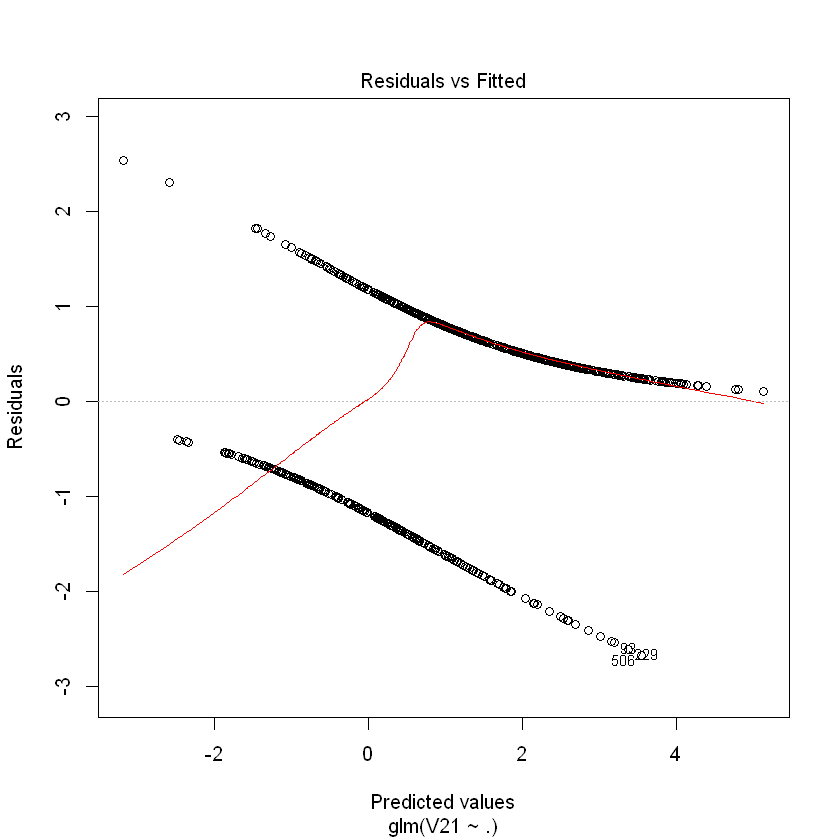

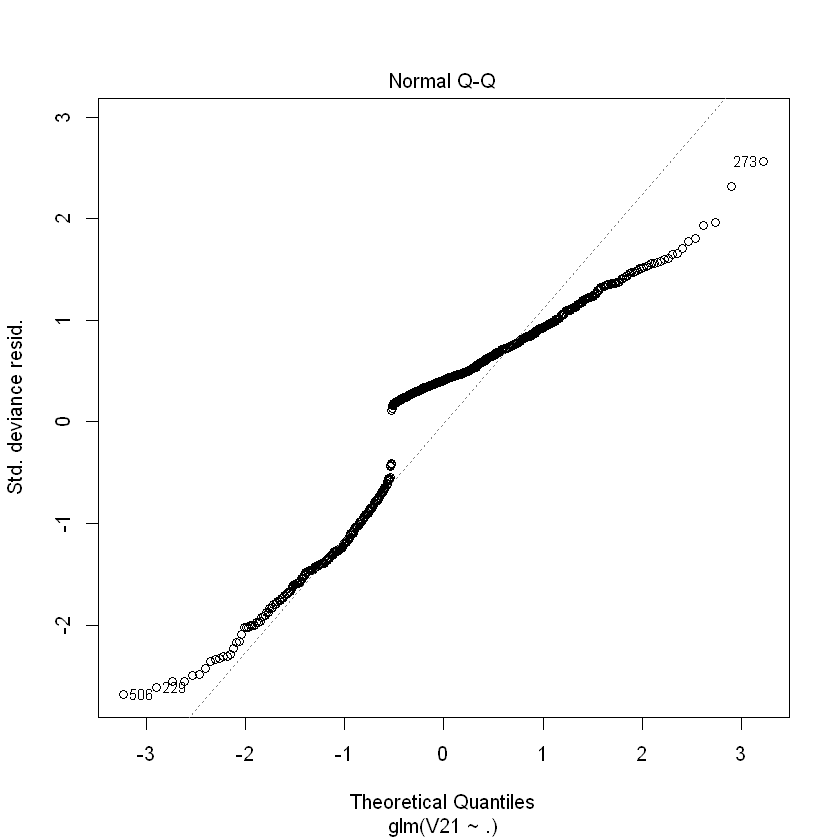

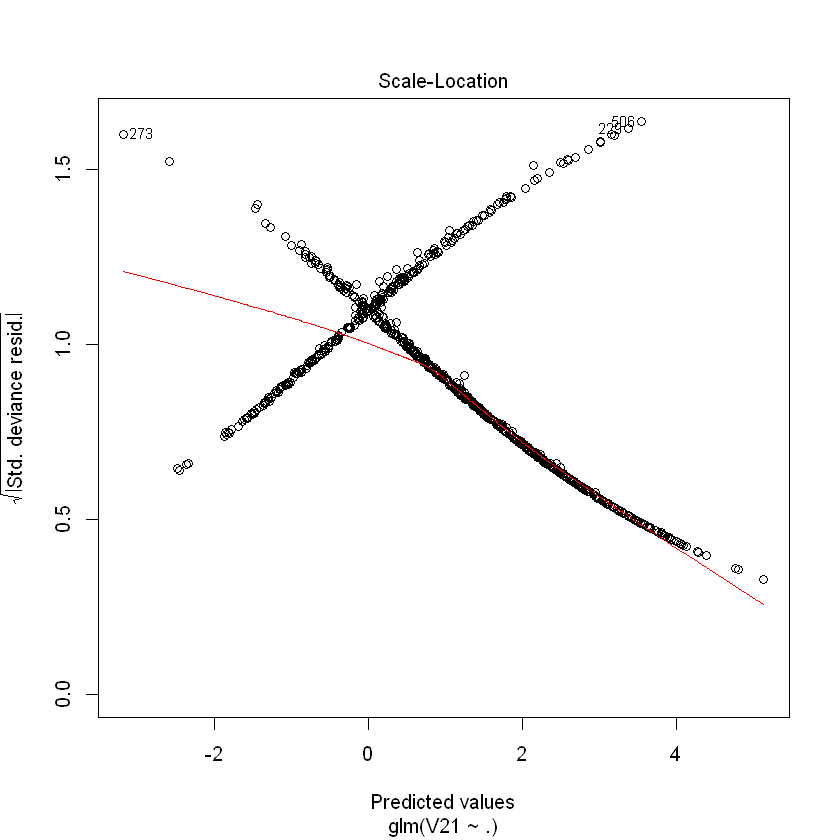

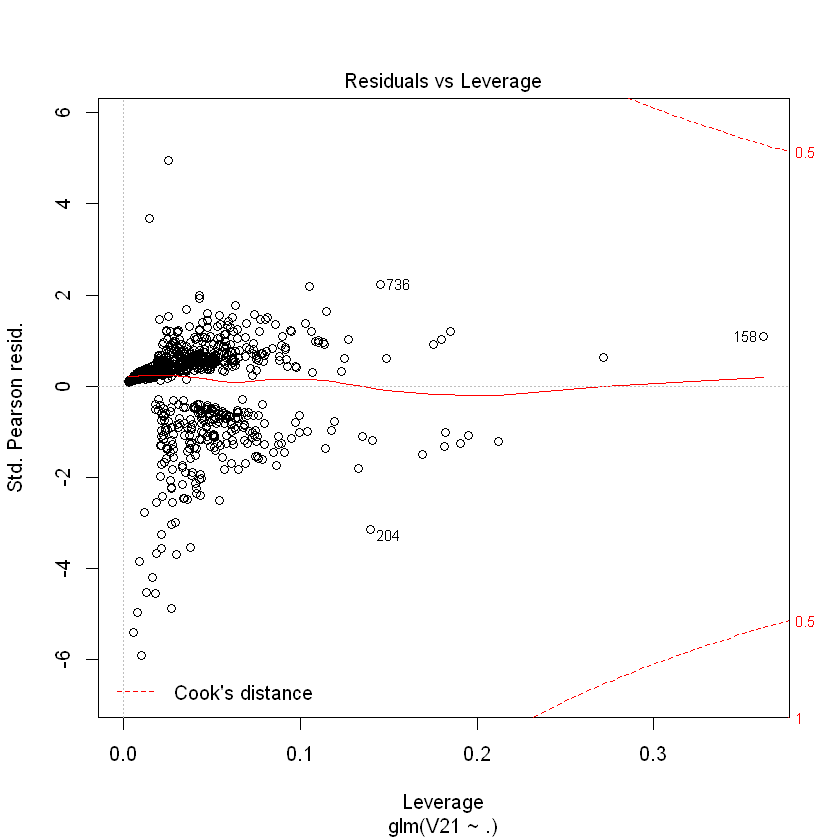

In [20]:
plot(log_reg1)

In [21]:
# Now let us test the model on testSet:

# Predict the resulting variable:
p_lr1 <- predict(log_reg1, testSet1, type = "response")
# Look at the probabilities:
head(cbind(p_lr, testSet$V21))

,p_lr,
801,0.7630939,1
802,0.8606163,1
803,0.6410739,1
804,0.9774090,1
805,0.5677489,1
806,0.4951014,0


In [22]:
# Precision, recall, F-Scores...

(cm_lr1 <- table("Actual"=testSet1$V21,"Prediction"=round(p_lr1)))

      Prediction
Actual   0   1
     0  29  32
     1  17 122

In [23]:
# Accuracy:
n1 <- nrow(testSet1)                
diag1 <- diag(cm_lr1)   
Accuracy1 <- sum(diag1)/n1      
round(Accuracy1*100,2)

[1] 75.5

In [24]:
rsums1 = apply(cm_lr1, 1, sum)  # number of observations per class
csums1 = apply(cm_lr1, 2, sum)  # number of predictions per class
Actual.Dist1 = rsums1 / n1                  # distribution of observations over the actual classes
Predicted.Dist1= csums1 / n1                    # distribution of observations over the predicted classes
round(data.frame(Actual.Dist1,Predicted.Dist1)*100,2)

,Actual.Dist1,Predicted.Dist1
0,30.5,23
1,69.5,77


In [25]:
Precision1 = diag1 / csums1
Recall_1 = diag1 / rsums1
F1_1 = 2 * Precision1 * Recall_1 / (Precision1 + Recall_1) 
round(data.frame(Precision1, Recall_1, F1_1, Actual.Dist1, Predicted.Dist1)*100,2)

# With less variables, we can see that the Logistic model is than before (75.5% Accuracy vs 73%).
# It is better at predicting Negative values - however, it is even more biased than before at predicting Positive values.
# This results in more Positive values being correct (recall), but an overall similar Precision. Overall, the model 
# now predicts more Positives, and has an identical success rate on them. It has a better success rate predicting 
# Negatives, but predicts less of them. 

,Precision1,Recall_1,F1_1,Actual.Dist1,Predicted.Dist1
0,63.04,47.54,54.21,30.5,23
1,79.22,87.77,83.28,69.5,77


In [26]:
# Naive Bayes requires the response variable to be qualitative:
trainSet1$V21 <- as.factor(trainSet1$V21)

# create the Naive Bayes model on training data, using all predictors:
n_bayes1 <- naive_bayes(trainSet1$V21 ~ ., data = trainSet1)
n_bayes1

===================== Naive Bayes ===================== 
Call: 
naive_bayes.formula(formula = trainSet1$V21 ~ ., data = trainSet1)

A priori probabilities: 

      0       1 
0.29875 0.70125 

Tables: 
     
V1             0          1
  A11 0.41422594 0.19607843
  A12 0.38912134 0.23707665
  A13 0.05020921 0.07664884
  A14 0.14644351 0.49019608

      
V2            0        1
  mean 24.55649 18.98752
  sd   13.27805 11.25317

     
V3             0          1
  A30 0.08368201 0.02317291
  A31 0.08786611 0.02852050
  A32 0.54811715 0.52228164
  A33 0.10041841 0.08377897
  A34 0.17991632 0.34224599

      
V4              0          1
  A40  0.29707113 0.20142602
  A41  0.05020921 0.12299465
  A410 0.01673640 0.01069519
  A42  0.18828452 0.17647059
  A43  0.20920502 0.30837790
  A44  0.01255230 0.01069519
  A45  0.02928870 0.02139037
  A46  0.08368201 0.04456328
  A48  0.00418410 0.01247772
  A49  0.10878661 0.09090909

      
V5            0        1
  mean 3815.962 2924.717
  sd   34

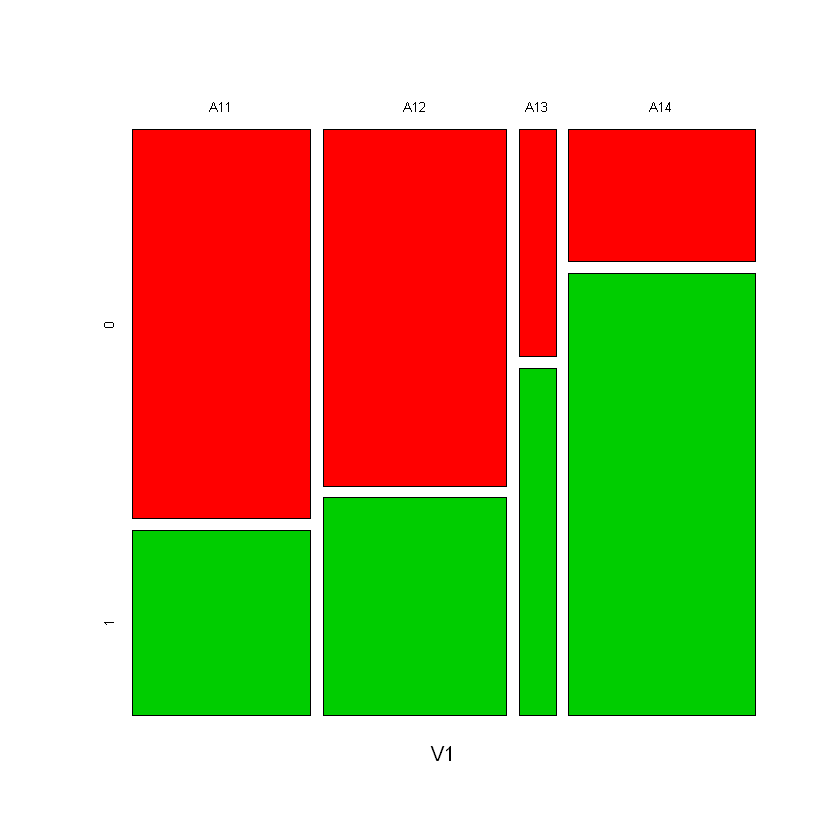

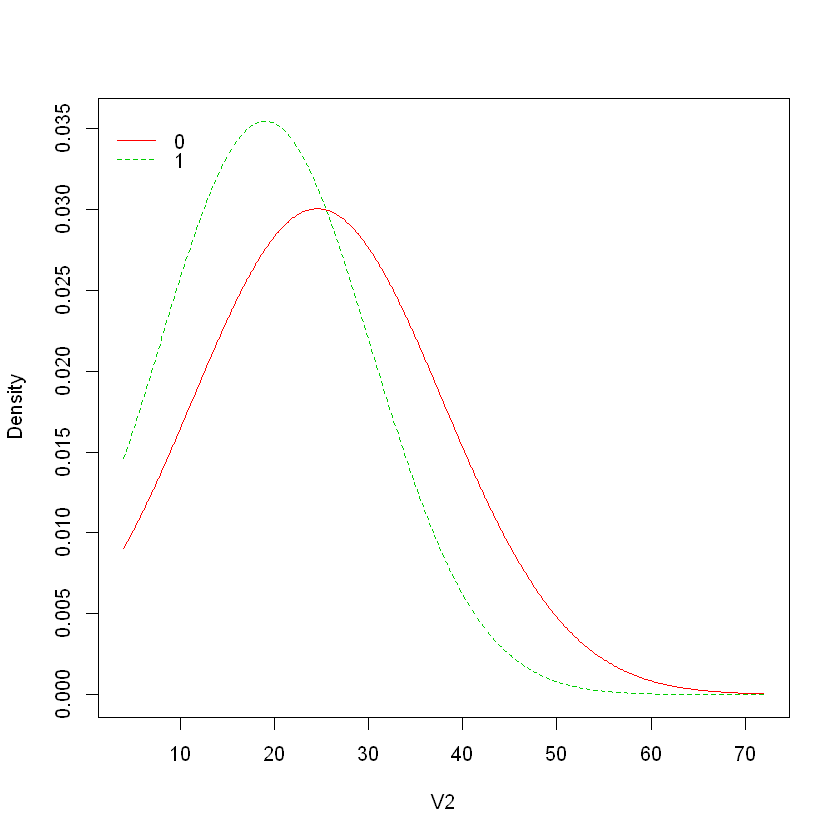

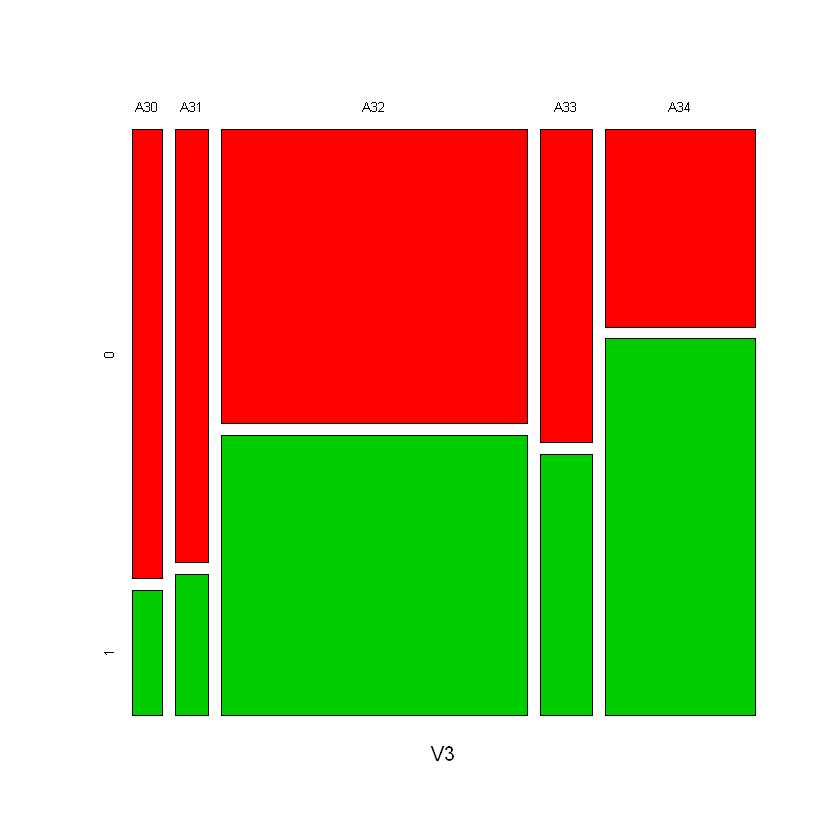

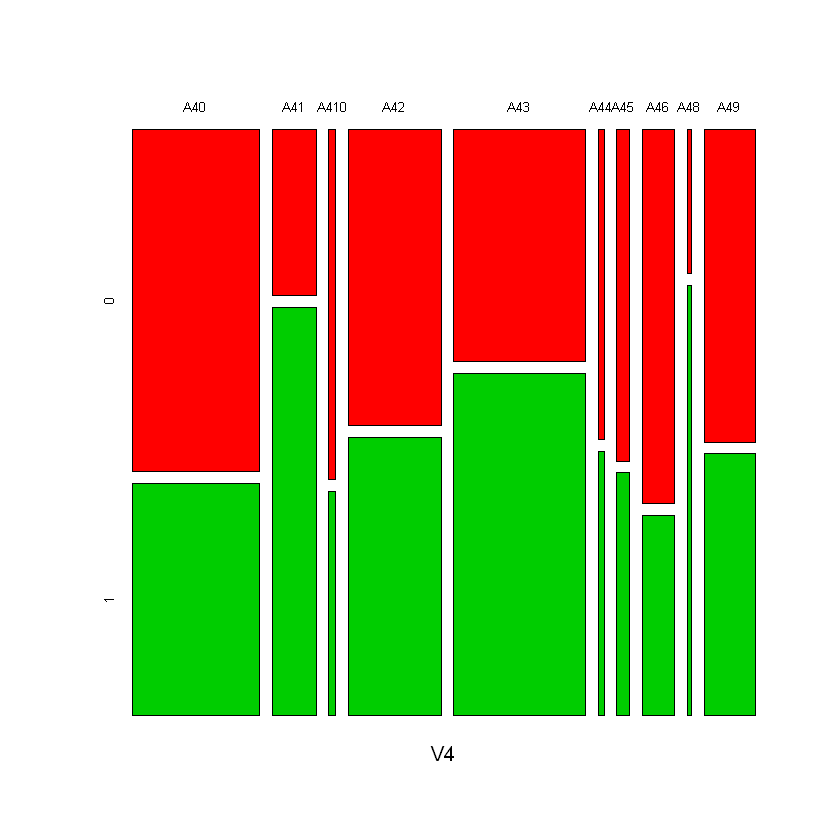

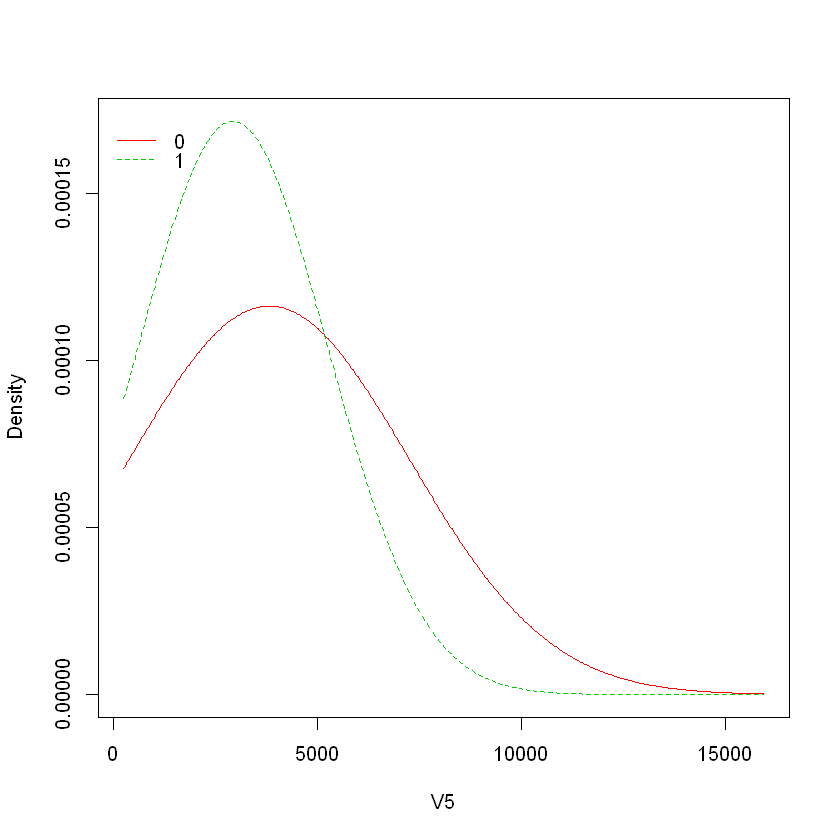

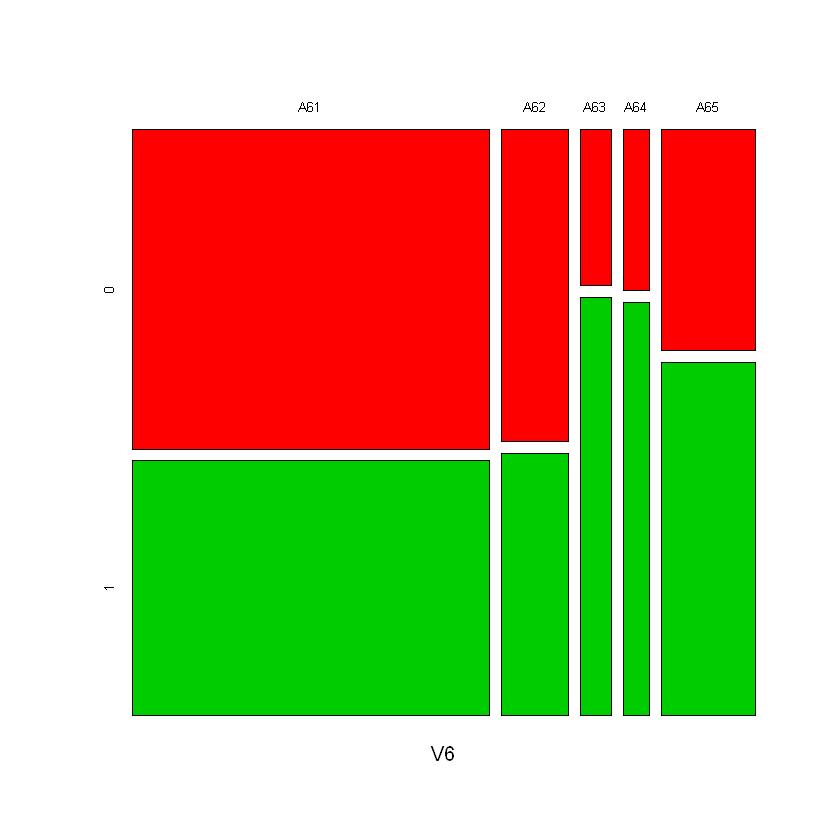

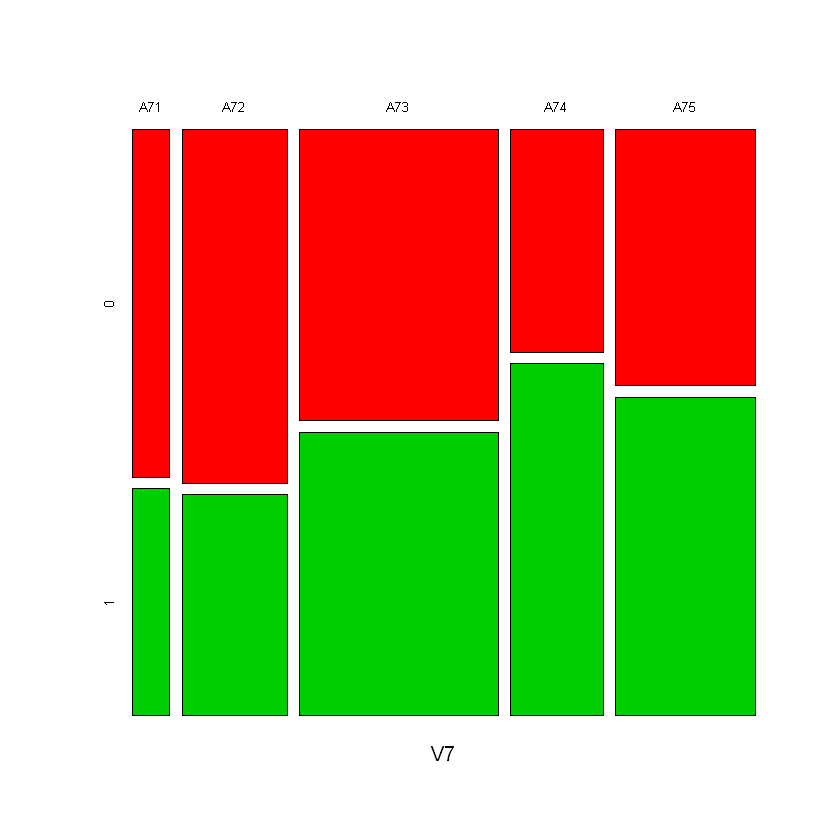

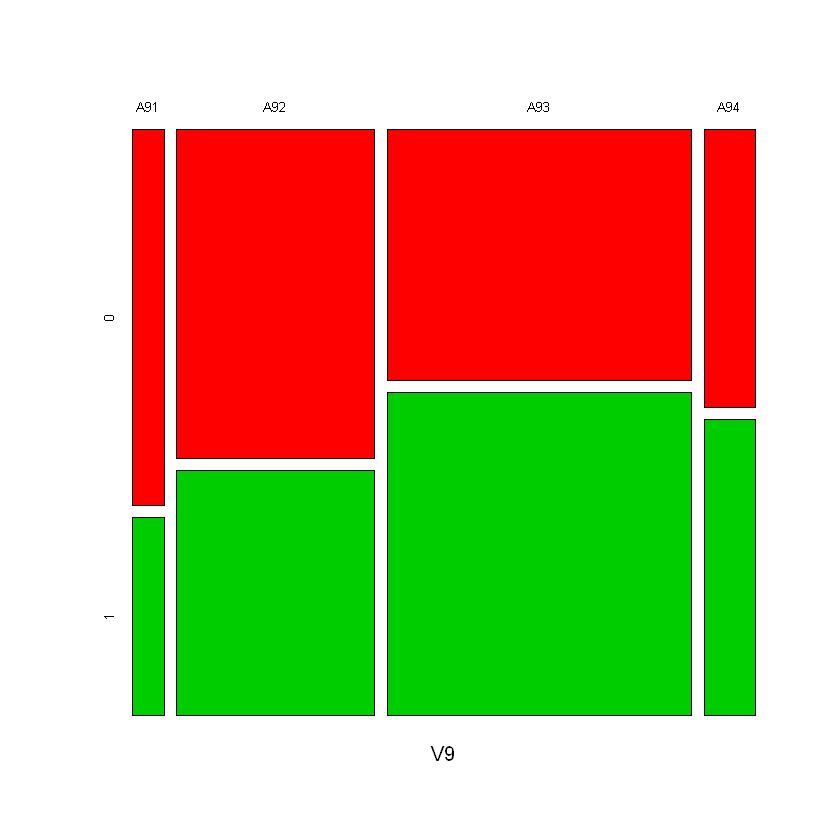

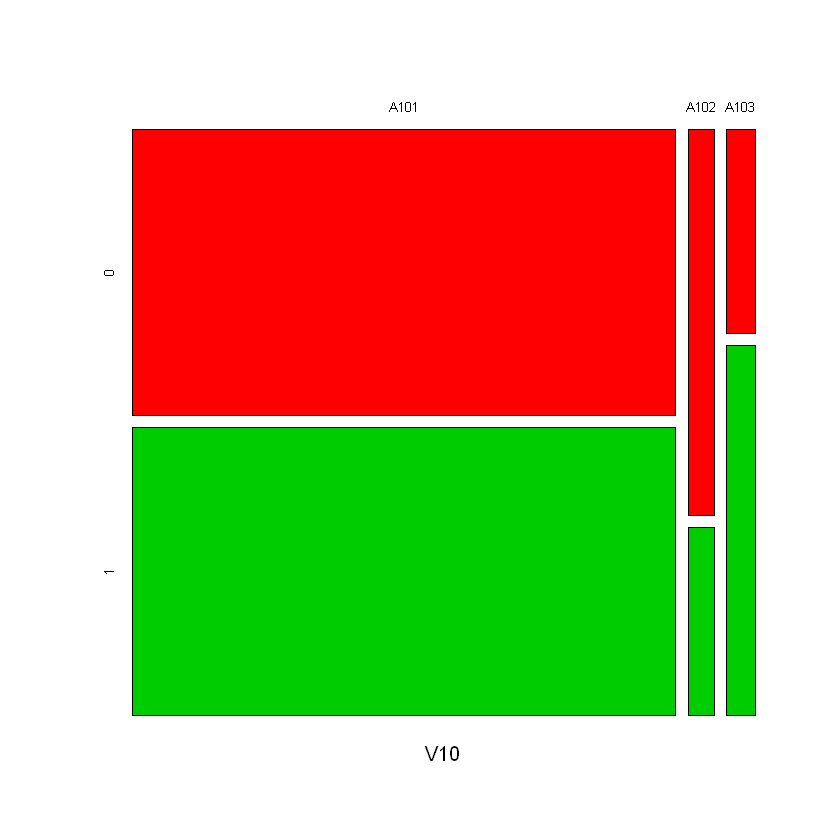

In [27]:
# We can plot this model:
plot(n_bayes1)

In [28]:
# Predict the response variable:
p_nb1 <- predict(n_bayes1, testSet1, type = "prob")
# Look at the probabilities:
head(cbind(p_nb1, testSet1$V21))

0,1,
0.056662297,0.94333770,1
0.083458189,0.91654181,1
0.305117281,0.69488272,1
0.007993081,0.99200692,1
0.705824377,0.29417562,1
0.926164818,0.07383518,0


In [29]:
# Now print a confusion matrix to see how correctly the prediction worked:

print(cm_nb1 <- as.matrix(table("Actual"=testSet1$V21,"Prediction"=round(p_nb1[,2]))))

      Prediction
Actual   0   1
     0  33  28
     1  14 125


In [30]:
# The accuracy will be (TP+TN)/n, where n is no of observations:

dm1 <- diag(cm_nb1)
acc_nb1 <- sum(dm1)/nrow(testSet1)
print(round(acc_nb1*100,2))

# The Naive Bayes Model, after removing variables, still predicts 79% of results correctly overall.

[1] 79


In [31]:
# Distribution over actual and predicted:

rs1 <- apply(cm_nb1, 1, sum)
cs1 <- apply(cm_nb1, 2, sum)
actual_dist1 <- rs1/nrow(testSet1)
predicted_dist1 <- cs1/nrow(testSet1)
round(data.frame(actual_dist1, predicted_dist1)*100,2)

,actual_dist1,predicted_dist1
0,30.5,23.5
1,69.5,76.5


In [32]:
# Precision, recall and F1 for each class.

# Calculation of precision, recall and f1 metrics:

Precision1 = dm1/cs1
Recall_1 = dm1/rs1
F1_1 = 2*Precision1*Recall_1/(Precision1+Recall_1)
round(data.frame(Precision1, Recall_1, F1_1, actual_dist1, predicted_dist1)*100, 2)

# Overall, the model is similar to before. It gets 79% of predictions right (Accuracy) both times. It is also more biased 
# towards Positive predictions now versus last time (76.5% vs 73.5%). Its has higher Precision on Negative values, but 
# predicts less of them. It catches a lot of Positive values (higher Recall), but is slightly less accurate in its predictions 
# of them versus last time (Precision), because it is making more Positive predictions. 

# The models perform equal to or better than last time when we remove variables. However, it is notable that they predict
# more Positives, which may be a business scenario we wish to avoid, since we want to avoid False Positives.

,Precision1,Recall_1,F1_1,actual_dist1,predicted_dist1
0,70.21,54.10,61.11,30.5,23.5
1,81.70,89.93,85.62,69.5,76.5


### Task 1.3:
Plot a ROC curve for each of the models built in (2) and report its AUC. Discuss your findings.

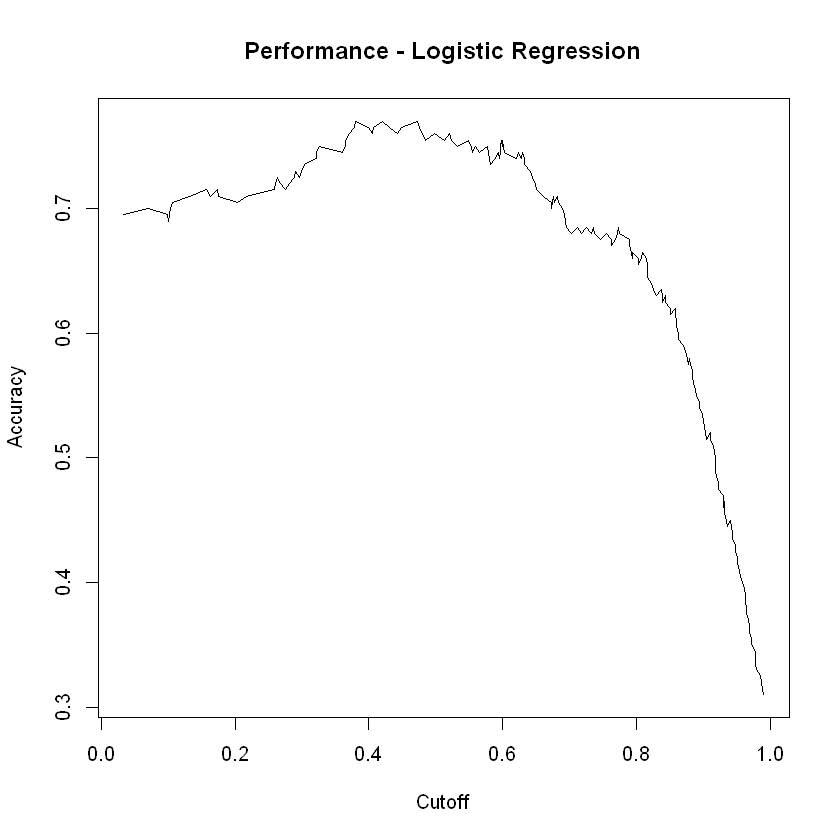

In [33]:
library(ROCR)
# We have predictions for this test set:

pred <- prediction(p_lr1, testSet1$V21)
eval <- performance(pred, "acc")
plot(eval, main="Performance - Logistic Regression")

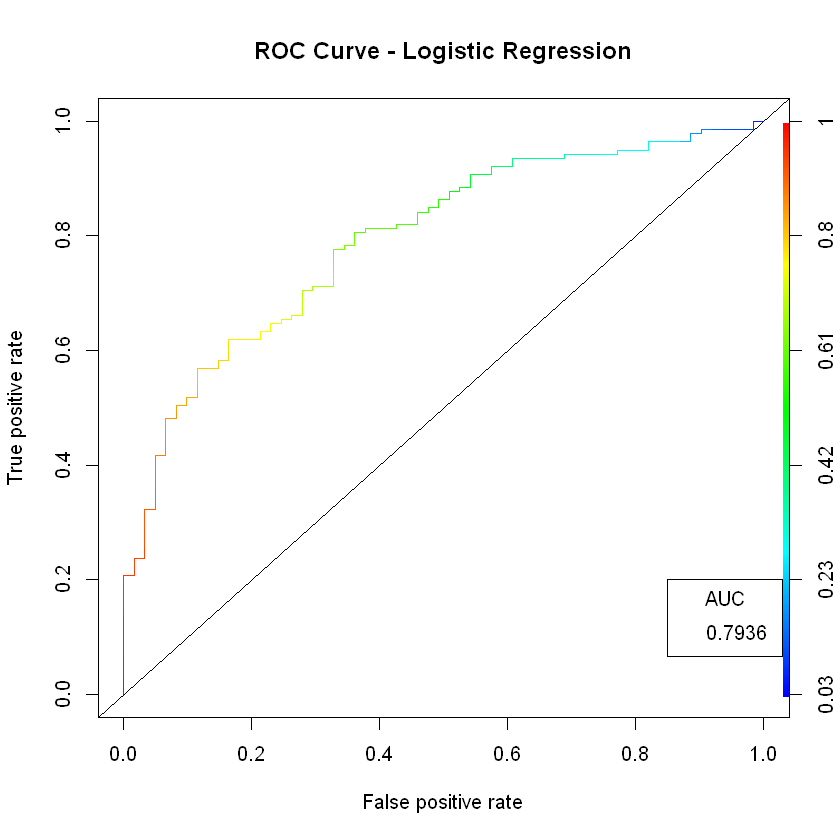

In [34]:
# To assess the performance of the model we need the ROC curve:
roc <- performance(pred, "tpr", "fpr")
plot(roc, colorize=TRUE, main="ROC Curve - Logistic Regression")
abline(a=0, b=1)

# we can calculate AUC and show it on the graph as indication of performance:
auc <- performance(pred, "auc")
legend(0.85, 0.2, round(auc@y.values[[1]],4), title = "AUC")

In [35]:
# The ROC curve shows that the model is decent at classifying the variable - the further away that the curve is from
# the neutral line, the better. The AUC is 0.79, which is decent (we would look for an AUC above 0.7 in this context, as 
# we are using is as a predictive variable).

# In the case of the German Credit business, we would want to reduce the instances of False Positives and increase 
# True positives. We can see that, at a cutoff classifier point of about 0.61, the True Positive Rate will be 80% 
# and the False Positive rate will only be 40%, which may be acceptable for this business. They may make a decision, 
# however, to have an even lower cut-off, so as to avoid False Positives.

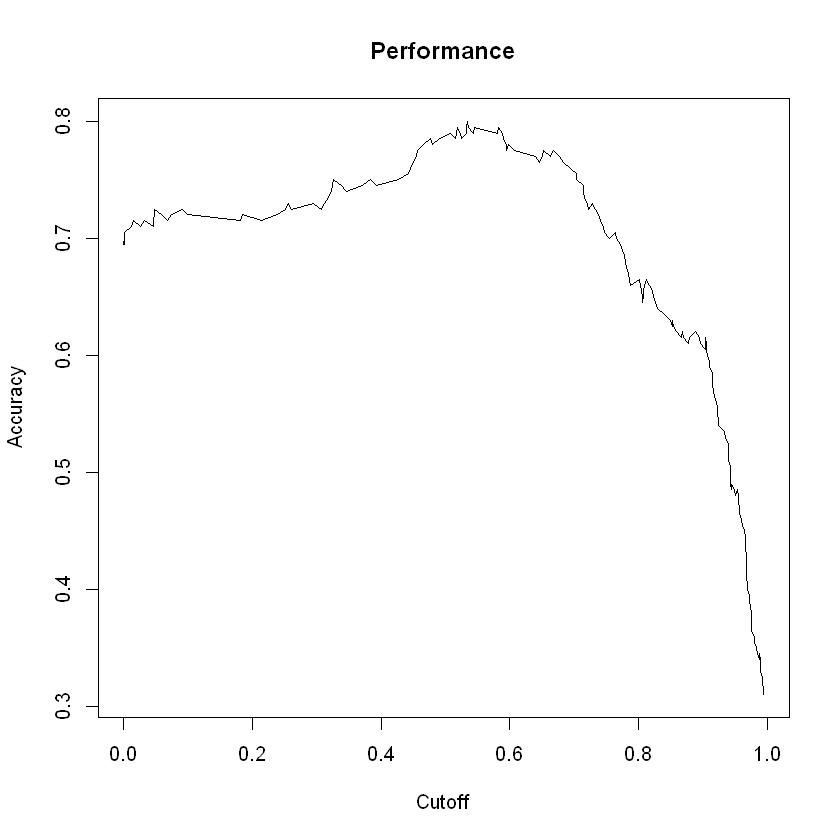

In [36]:
pred <- prediction(p_nb1[,2], testSet1$V21)

eval <- performance(pred, "acc")
plot(eval, main="Performance")

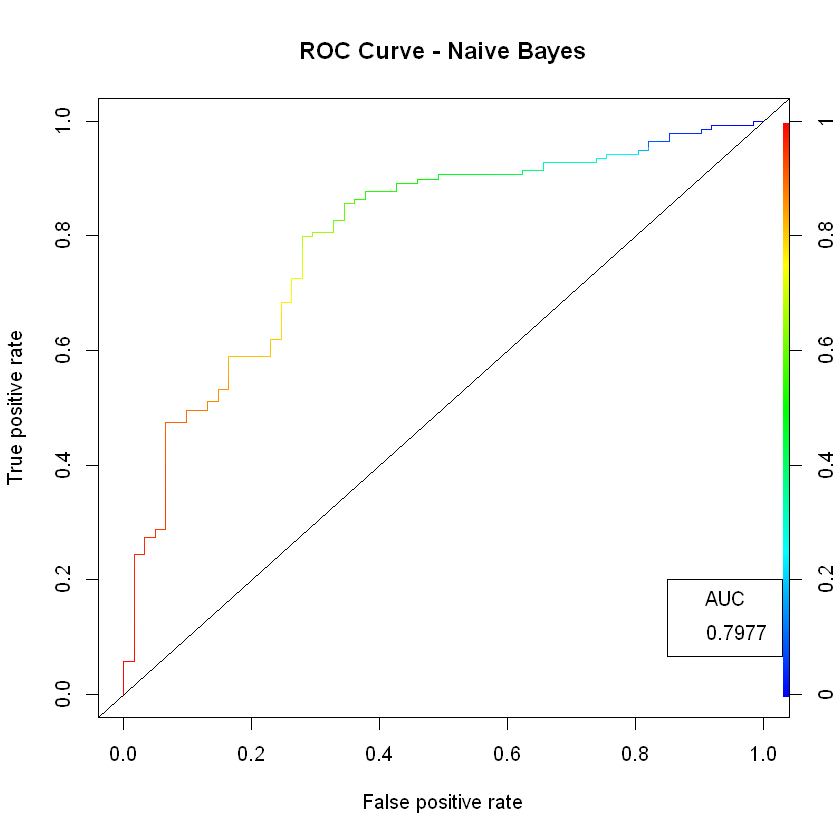

In [37]:
# To assess the performance of the model we need the ROC curve:
roc <- performance(pred, "tpr", "fpr")
plot(roc, colorize=TRUE, main="ROC Curve - Naive Bayes")
abline(a=0, b=1)

# We can calculate AUC and show it on the graph as indication of performance:
auc <- performance(pred, "auc")
legend(0.85, 0.2, round(auc@y.values[[1]],4), title = "AUC")

In [38]:
# The Naive Bayes is marginally better than the Logistic regression, with a slightly better AUC score. With a cut-off point
# of around 0.7, there is a True Positive Rate of about 80% and a False Positive of only about 35%. This is a good scenario
# for the company, as it is looking to have a low rate of False Positives. This shows that the Naive Bayes classifier
# may be a better model to choose. 

### Task 1.4
By default, there are approximately 30% bad customers in the data. Downsampling bad customers to only 30 in the training data, and build a logistic regression and a naive Bayes using the same predictors selected in (2). Plot the ROC curves and compute the AUC. Explain the models' performance for imbalanced data.

__Notice__: your models' performance will not be assessed for this assignment. However, you are *encouraged* to try different data wrangling or variable selection techniques to maximize the efficiency. This question aims to assess your understanding of modeling and interpretation of different model evaluation metrics.

In [39]:
# Create a new training sample with 30 bad customers, from training set with predictors 

# Predictors come from those selected in (1.2)
trainSample <- rbind(subset(trainSet1,V21==0)[1:30,], subset(trainSet1, V21==1))

In [40]:
# Now we have imbalanced training data set, with only 5% of the minority class (0).
# We shall keep the same predictors and testing data as in (1.2).

# Fit the Logistic Regression model on this sample:
log_reg4 <- glm(V21~., data = trainSample, family = binomial)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [41]:
# We will test the models and evaluate the metrics on the same test set from (1.2)

#Logistic Regression:
p_lr4 <- predict(log_reg4, testSet1, type = "response")

# predictions vs actual
head(cbind(p_lr4, testSet1$V21))

,p_lr4,
801,0.9431159,1
802,1.0000000,1
803,0.8751798,1
804,0.9955197,1
805,0.9694918,1
806,0.8760742,0


In [42]:
# confusion matrix :

(cm_lr4 <- as.matrix(table("Actual"=testSet1$V21,"Prediction"=round(p_lr4))))

# We can see that very few are classified as 0.

      Prediction
Actual   0   1
     0   6  55
     1   1 138

In [43]:
# accuracy:
n4 <- nrow(testSet1)                
diag4 <- diag(cm_lr4)   
Accuracy4 <- sum(diag4)/n4      
round(Accuracy4*100,2)

[1] 72

In [44]:
# Distribution of observations:
rsums4 = apply(cm_lr4, 1, sum)  # number of observations per class
csums4 = apply(cm_lr4, 2, sum)  # number of predictions per class
Actual.Dist4 = rsums4 / n4                  # distribution of observations over the actual classes
Predicted.Dist4= csums4 / n4                    # distribution of observations over the predicted classes
round(data.frame(Actual.Dist4,Predicted.Dist4)*100,2)

,Actual.Dist4,Predicted.Dist4
0,30.5,3.5
1,69.5,96.5


In [45]:
# Pecision, Recall, F1
Precision4 = diag4 / csums4
Recall_4 = diag4 / rsums4
F1_4 = 2 * Precision4 * Recall_4 / (Precision4 + Recall_4) 
round(data.frame(Precision4, Recall_4, F1_4, Actual.Dist4, Predicted.Dist4)*100,2)

,Precision4,Recall_4,F1_4,Actual.Dist4,Predicted.Dist4
0,85.71,9.84,17.65,30.5,3.5
1,71.50,99.28,83.13,69.5,96.5


In [46]:
# As expected, the model is heavily biased towards positive predictions due to its skewed Training Set. 

# As a result, it catches most of the Positive Results, but very few of the Negative results. However, its Precision
# on catching Negatives is high, and lower for Positives.

In [47]:
# Naive Bayes model on the same training sample

trainSample$V21 <- as.factor(trainSample$V21)
n_bayes4 <- naive_bayes(V21 ~ ., data = trainSample)
n_bayes4

===================== Naive Bayes ===================== 
Call: 
naive_bayes.formula(formula = V21 ~ ., data = trainSample)

A priori probabilities: 

         0          1 
0.05076142 0.94923858 

Tables: 
     
V1             0          1
  A11 0.40000000 0.19607843
  A12 0.40000000 0.23707665
  A13 0.03333333 0.07664884
  A14 0.16666667 0.49019608

      
V2            0        1
  mean 32.60000 18.98752
  sd   13.31735 11.25317

     
V3             0          1
  A30 0.13333333 0.02317291
  A31 0.03333333 0.02852050
  A32 0.43333333 0.52228164
  A33 0.10000000 0.08377897
  A34 0.30000000 0.34224599

      
V4              0          1
  A40  0.23333333 0.20142602
  A41  0.06666667 0.12299465
  A410 0.03333333 0.01069519
  A42  0.06666667 0.17647059
  A43  0.30000000 0.30837790
  A44  0.00000000 0.01069519
  A45  0.03333333 0.02139037
  A46  0.10000000 0.04456328
  A48  0.00000000 0.01247772
  A49  0.16666667 0.09090909

      
V5            0        1
  mean 5657.033 2924.717
  sd 

In [48]:
# Predict the response variable:
p_nb4 <- predict(n_bayes4, testSet1, type = "prob")

# Look at the probabilities:
head(cbind(p_nb4, testSet1$V21))

0,1,
0.015439396,0.9845606,1
0.000000000,1.0000000,1
0.024125896,0.9758741,1
0.001803103,0.9981969,1
0.119377661,0.8806223,1
0.645802137,0.3541979,0


In [49]:
# confusion table
(cm_nb4 <- as.matrix(table("Actual"=testSet1$V21,"Prediction"=round(p_nb4[,2]))))

# Naive Bayes predicts a few more Negatives, but not by much.

      Prediction
Actual   0   1
     0  10  51
     1   7 132

In [50]:
#Accuracy:
dm4 <- diag(cm_nb4)
acc_nb4 <- sum(dm4)/nrow(testSet1)
print(round(acc_nb4*100,2))

[1] 71


In [51]:
# distribution over actual and predicted:
rs4 <- apply(cm_nb4, 1, sum)
cs4 <- apply(cm_nb4, 2, sum)
actual_dist4 <- rs4/nrow(testSet1)
predicted_dist4 <- cs4/nrow(testSet1)
round(data.frame(actual_dist4, predicted_dist4)*100,2)

,actual_dist4,predicted_dist4
0,30.5,8.5
1,69.5,91.5


In [52]:
# calculation of precision, recall and f1 metrics:

Precision4 = dm4/cs4
Recall_4 = dm1/rs1
F1_4 = 2*Precision4*Recall_4/(Precision4+Recall_4)
round(data.frame(Precision4, Recall_4, F1_4, actual_dist4, predicted_dist4)*100, 2)

,Precision4,Recall_4,F1_4,actual_dist4,predicted_dist4
0,58.82,54.10,56.36,30.5,8.5
1,72.13,89.93,80.05,69.5,91.5


In [53]:
# Naive Bayes is more balanced despite its skewed training dataset. 
# It catches more Negatives than the Logistic Regression, but has a poorer accuracy predicting them. It catches most
# Positive results, with OK accuracy of prediction. 

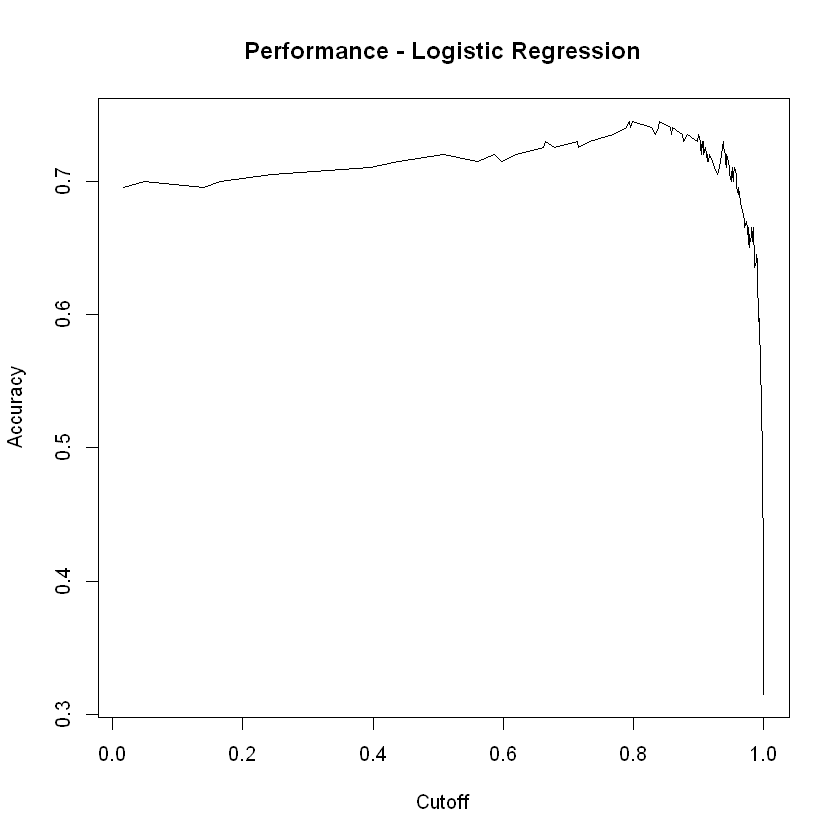

In [54]:
# ROC curve for Logistic Regression model lr4 on data set testSet1:

pred <- prediction(p_lr4, testSet1$V21)

eval <- performance(pred, "acc")
plot(eval, main="Performance - Logistic Regression")

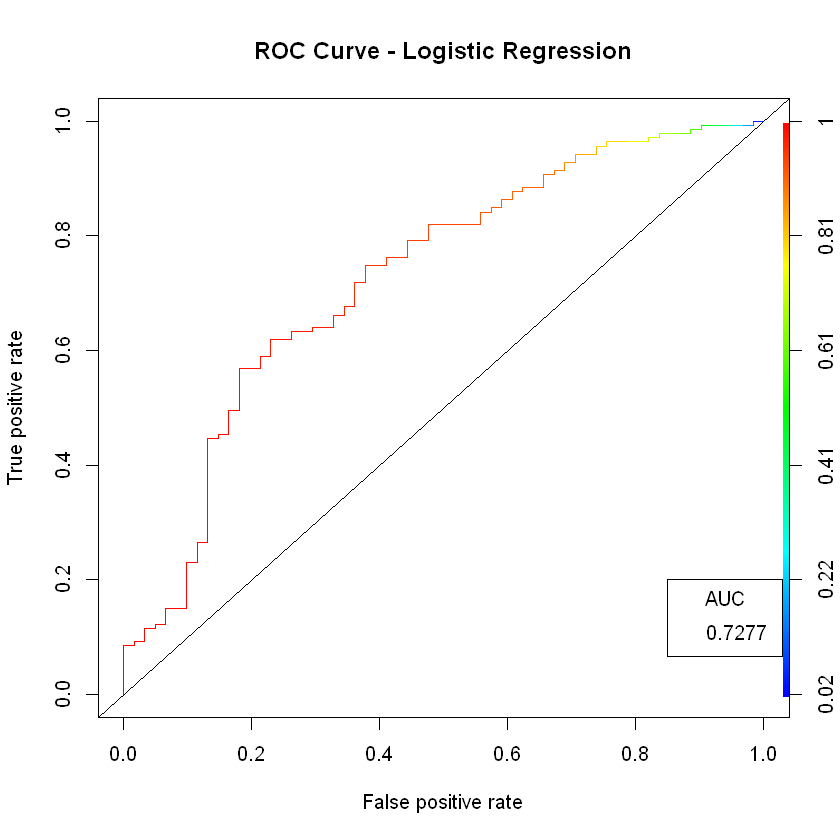

In [55]:
# to assess the performance of the model we need the ROC curve:
roc <- performance(pred, "tpr", "fpr")
plot(roc, colorize=TRUE, main="ROC Curve - Logistic Regression")
abline(a=0, b=1)

# we can calculate AUC and show it on the graph as indication of performance:
auc <- performance(pred, "auc")
legend(0.85, 0.2, round(auc@y.values[[1]],4), title = "AUC")


In [56]:
# We can see that this model doesn't perform as well. Its False Positive Rate is higher relative to its True Positive Rate.
# This is not ideal for the German Credit business, where a False Positive is discouraged. A False Positive Rate of 35%, for 
# instance, would require a cut-off of over 0.81, and would only give a True Positive Rate of 60%. 

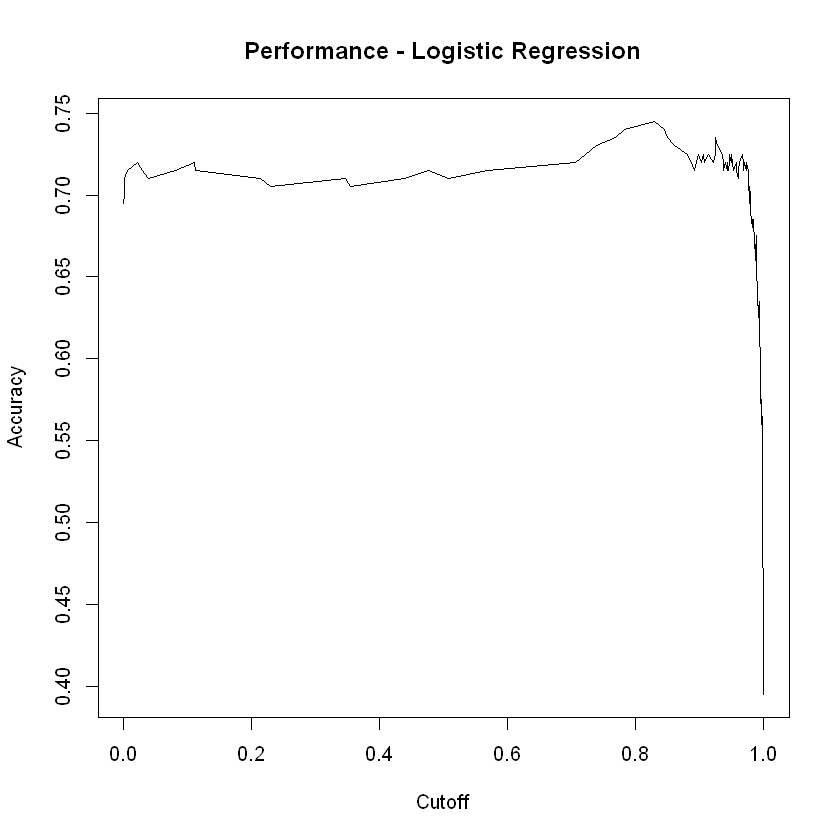

In [57]:
pred <- prediction(p_nb4[,2], testSet1$V21)

eval <- performance(pred, "acc")
plot(eval, main= "Performance - Logistic Regression")

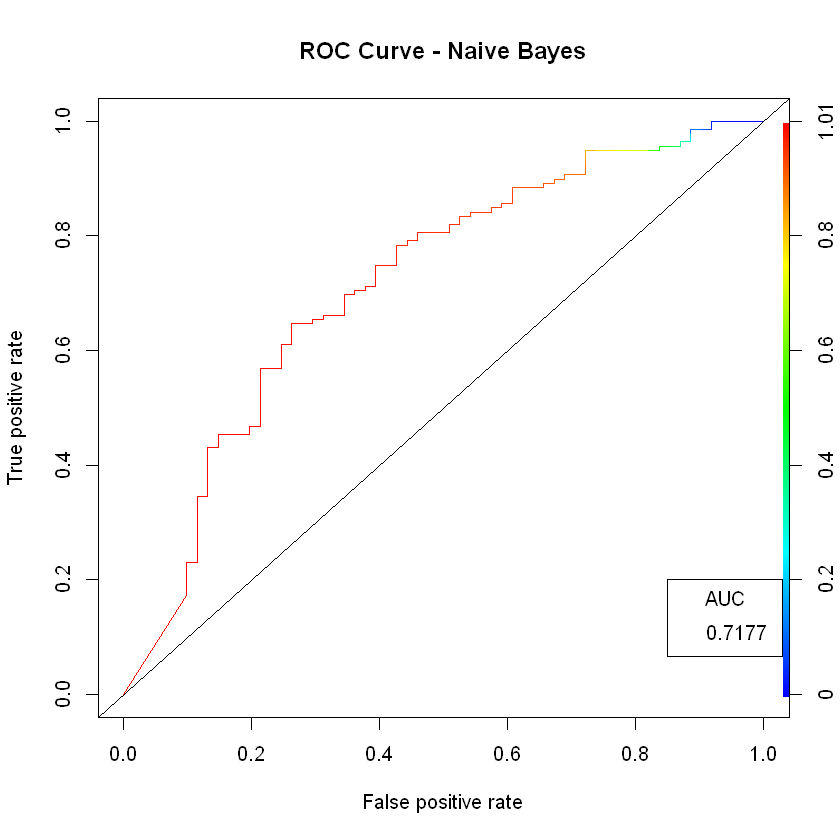

In [58]:
# to assess the performance of the model we need the ROC curve:
roc <- performance(pred, "tpr", "fpr")
plot(roc, colorize=TRUE, main="ROC Curve - Naive Bayes")
abline(a=0, b=1)
# we can calculate AUC and show it on the graph as indication of performance:
auc <- performance(pred, "auc")
legend(0.85, 0.2, round(auc@y.values[[1]],4), title = "AUC")

In [59]:
# Likewise, the Naive Bayes doesn't perform well. Its AUC score is even worse than the Logistic Regression.
# Again, a False Positive Rate of 35% would require a cut-off of over 0.81, and would only give a True Positive Rate of 60%. 

# Therefore, with skewed training data, the German Cars business would have to withstand a poor rate of Positive prediction,
# in order to guarantee avoiding False Positives. 

## Question 2 (30%)
Assume $p(x) =N(\mu=3, \sigma^2=4)+N(\mu=15, \sigma^2=16)$ is a mixture of two Gaussian distributions where $\mu$ and $\sigma^2$ indicatate mean and variance, respectively. Implement the rejection sampling algorithm that samples data from $p(x)$.

### Task 2.1:
Based on the density of $p(x)$, propose a distribution $q(x)$ s.t. $cq(x)$ covers $p(x)$ for a constant $c$. Visualize $p(x)$ and $cq(x)$ in the same plot to justify your choice of $cq(x)$.

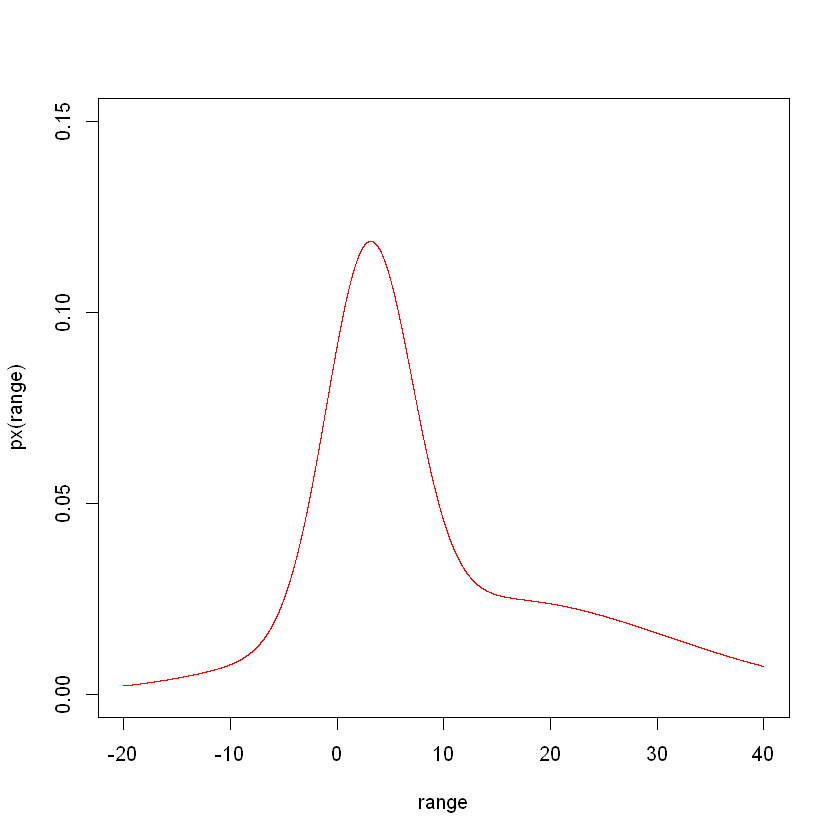

In [60]:
# Note: I read ahead for this question and did part 2.1 while taking into account that the range of interest was -20 to 40
# (as given in 2.2). If I did Q 2.1 without the range of interest, the normal distribution q(x) would not have worked, 
# as it would have overlapped with p(x) at its tails. In that case, I would have used a uniform distribution.
# I have kept my original working because I wanted to demonstrate the use of a normal distribution.

# Make a function for for p(x) and plot it for the range of interest of -20 to 40

px = function(x) 
{
    dnorm(x,3,4) + dnorm(x,15,16)
}

range <- seq(-20, 40, length=10000)
plot(range, px(range), type="l", col="red", ylim=c(0,0.15))

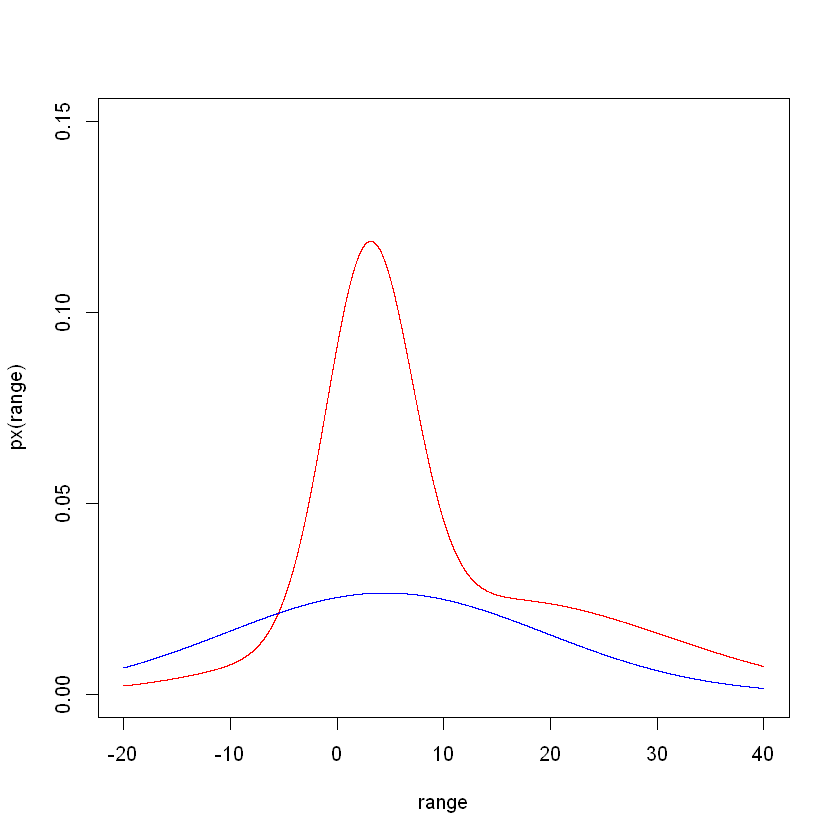

In [61]:
# p(x) follows a rough bell-curve shape, hence we can try to fit a normal distribution over it. 

# The normal distribution function below was chosen after a process of trial-and-error. I started with mean = 5,
# as this looked close to where p(x) had highest density. After trying different combinations of means and standard deviations 
# using plotted graphs as a guide (see some of the graphs below), I came to the final result:

qx = function(x)
{
    dnorm(x, mean=4.5, sd = 15)
}

# Plot both p(x) and q(x)

plot(range, px(range), type="l", col="red", ylim=c(0,0.15))
lines(range, qx(range), type="l", col="blue")

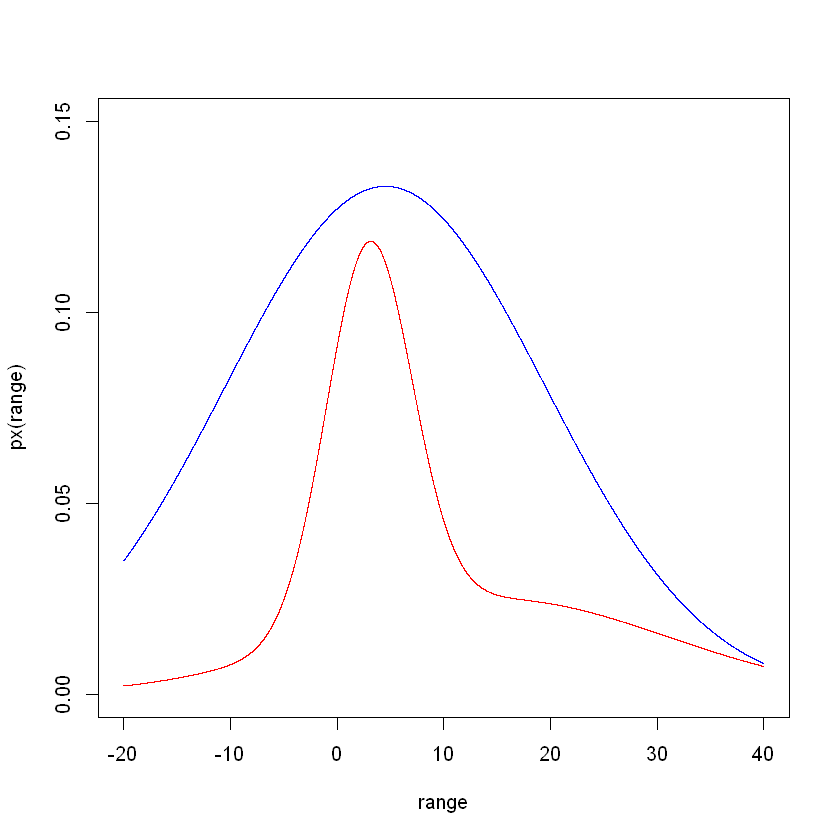

In [62]:
# Our q(x) distribution doesn't fit over p(x) - therefore we can give it a multiplier, c
c=5

# Try again, this time applying our multiplier
plot(range, px(range), type="l", col="red", ylim=c(0,0.15))
lines(range, qx(range)*c, type="l", col="blue")

# cq(x) fits over our line quite tightly.

# I think this is a good distribution to fit over, as there is relatively little space between p(x) and q(x). 
# This means it will be more efficient at sampling and we will get closer to our required distribution,
# with less samples.

### Task 2.2:
Implement the rejection sampling algorithm to sample 10000 data from $p(x)$ for
$x \in [-20,40]$. Plot
a histogram (or any other plot) to demonstrate that the sampled data roughly follows
the original distribution $p(x)$.

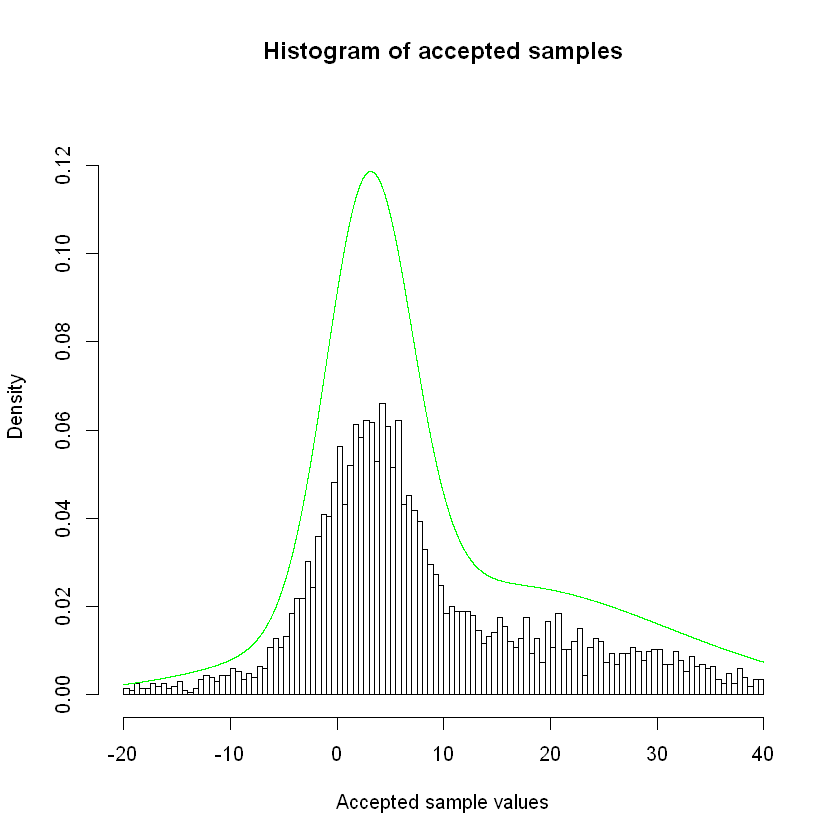

In [63]:
# Now we select 10,000 samples between -20 and 40 and calculate the densities of p(x) / q(x)
# For each sample we generate a uniform sample, u, between 0 and 1 which we compare against the p(x)/q(x) 
# If u < p(x)/q(x), we add this value to our sample.

# We get the 10,000 samples from our normal distribution q(x). Note that I use the 'truncnorm' package 
# because I need a 'truncated' normal distribution which only has values >= -20 and <= 40.
# rtruncnorm works by sampling and a normal distribution until the required number of 
# samples inside our parameters (-20 and 40) are reached. It then plots only those samples.

library(truncnorm)

g.sample = rtruncnorm(10000, a=-20, b=40, mean=4.5, sd=15)

acpt=c() # initialize an accumulator for our accepted samples
for (i in 1:length(g.sample))
{
    u=runif(1,0,1) # uniform sample for deciding accept/reject
    if(u < px(g.sample[i]) / (qx(g.sample[i])*c)) # If the uniform sample is less than p(x)/q(x)
    {
        acpt[i]=1 # Add to our accepted sample accumulator
    }
    else 
    {
        acpt[i]=0 # Otherwise don't
    }
}

# A histogram of the accepted sample values
hist(g.sample[which(acpt==1)],breaks=100,freq=FALSE, xlab="Accepted sample values", ylim=c(0,0.13), 
     main="Histogram of accepted samples")

# Compared to our original p(x) function
lines(range,px(range), col="green")

# We can see that our sample fits the original double-Gaussian distribution